In [1]:

import MetaTrader5 as mt5
import pycaret
from pycaret.classification import *
import datetime
from datetime import timedelta
import numpy as np
import pandas as pd


from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import numpy as np
import pandas as pd
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt                    

import warnings
import matplotlib.pyplot as plt
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")

In [2]:
def plot_prediction(real, prediccion):
    plt.plot(real,color='red', label='Valor real de la acción')
    plt.plot(prediccion, color='blue', label='Predicción de la acción')
    plt.ylim(1.1 * np.min(prediccion)/2, 1.1 * np.max(prediccion))
    plt.xlabel('Tiempo')
    plt.ylabel('Valor de la acción')
    plt.legend()
    plt.show()

In [3]:
import os

# Obtener la ruta del directorio del notebook actual
directorio_actual = os.getcwd()

# Obtener el nombre de la carpeta del directorio actual
nombre_carpeta_actual = os.path.basename(directorio_actual)

print(nombre_carpeta_actual)

AUDUSD


In [4]:
# Inicializar MetaTrader 5
mt5.initialize()

# Definir el símbolo (par de divisas) y la temporalidad
symbol = nombre_carpeta_actual
timeframe = mt5.TIMEFRAME_H1
# Definir el período de tiempo deseado


# Obtener la fecha actual
#fecha_actual = datetime.datetime.now()
fecha_actual = datetime.datetime(2025, 7, 1)  
# Calcular la fecha de hace un año a partir de la fecha actual
start_date = fecha_actual - timedelta(days=1440)

# Definir end_date como la fecha actual
end_date = fecha_actual

# Convertir las fechas a objetos Timestamp de pandas
start_date = pd.Timestamp(start_date)
end_date = pd.Timestamp(end_date)

# Obtener datos históricos
historical_data = mt5.copy_rates_range(symbol, timeframe, start_date, end_date)

# Cerrar la conexión a MetaTrader 5
mt5.shutdown()

# Crear un DataFrame de pandas con los datos históricos
df0 = pd.DataFrame(historical_data)

# Convertir las marcas de tiempo en formato legible
#df['time'] = pd.to_datetime(df['time'], unit='s')
#data = df.set_index('time')
df0['time'] = pd.to_datetime(df0['time'], unit='s')

In [5]:
# Extraer los componentes de fecha y hora
df0['hour'] = df0['time'].dt.hour
df0['day'] = df0['time'].dt.day
df0['month'] = df0['time'].dt.month
df0['year'] = df0['time'].dt.year

In [6]:
df_1h=df0

In [7]:
df_1h

,time,open,high,low,close,tick_volume,spread,real_volume,hour,day,month,year
0,2021-07-22 00:00:00,0.73554,0.73612,0.73364,0.73580,236,7,0,0,22,7,2021
1,2021-07-22 01:00:00,0.73580,0.73583,0.73543,0.73570,435,0,0,1,22,7,2021
2,2021-07-22 02:00:00,0.73570,0.73581,0.73502,0.73516,545,0,0,2,22,7,2021
3,2021-07-22 03:00:00,0.73515,0.73527,0.73441,0.73454,1121,0,0,3,22,7,2021
4,2021-07-22 04:00:00,0.73455,0.73505,0.73422,0.73503,1731,0,0,4,22,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
24536,2025-06-30 20:00:00,0.65723,0.65766,0.65679,0.65700,5009,0,0,20,30,6,2025
24537,2025-06-30 21:00:00,0.65700,0.65797,0.65693,0.65784,4666,0,0,21,30,6,2025
24538,2025-06-30 22:00:00,0.65784,0.65822,0.65768,0.65806,3271,0,0,22,30,6,2025
24539,2025-06-30 23:00:00,0.65806,0.65830,0.65798,0.65808,1537,1,0,23,30,6,2025


##  ok

                        open     high      low    close  tick_volume  spread  \
time                                                                           
2021-07-22 16:00:00  0.73827  0.73974  0.73702  0.73745         5140       0   
2021-07-22 18:00:00  0.73811  0.73846  0.73553  0.73636         3093       0   
2021-07-22 19:00:00  0.73636  0.73729  0.73573  0.73722         2317       0   
2021-07-22 20:00:00  0.73722  0.73764  0.73692  0.73753         1742       0   
2021-07-22 23:00:00  0.73838  0.73838  0.73746  0.73746          677       0   
...                      ...      ...      ...      ...          ...     ...   
2025-06-27 00:00:00  0.65467  0.65467  0.65380  0.65454          543       7   
2025-06-27 02:00:00  0.65451  0.65495  0.65447  0.65470         2367       0   
2025-06-30 06:00:00  0.65329  0.65361  0.65304  0.65323         3461       0   
2025-06-30 10:00:00  0.65464  0.65465  0.65321  0.65341         7169       0   
2025-06-30 11:00:00  0.65341  0.65388  0

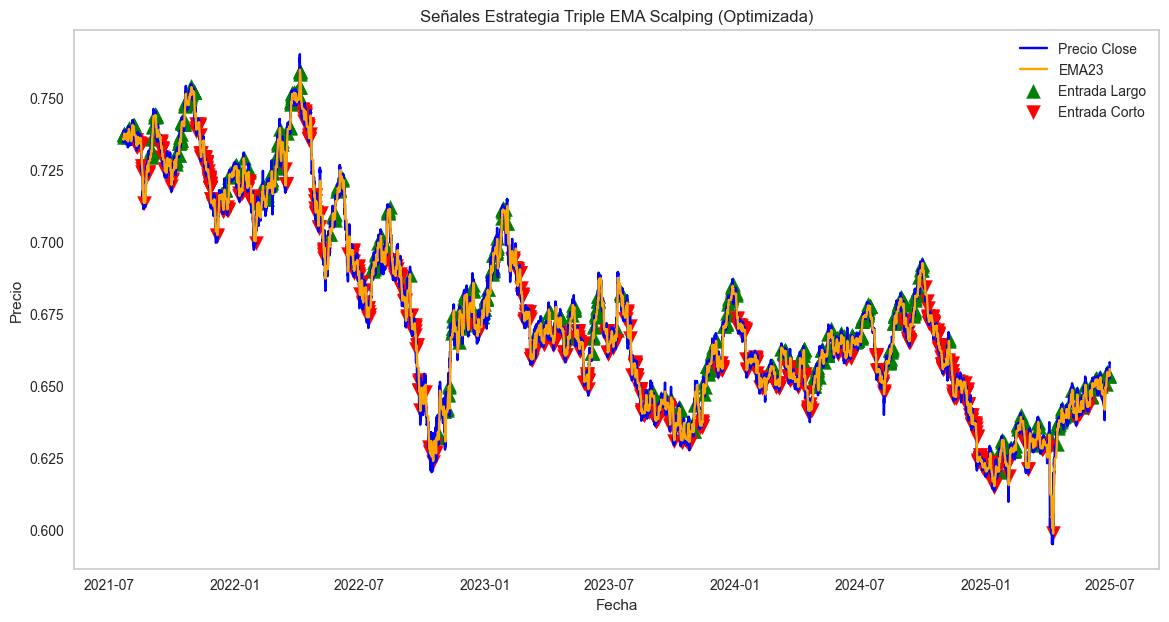

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def ema(series, period):
    return series.ewm(span=period, adjust=False).mean()

def rsi(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=period, min_periods=period).mean()
    avg_loss = loss.rolling(window=period, min_periods=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

def estrategia_triple_ema_scalping_unico_df(df_1h):
    if not pd.api.types.is_datetime64_any_dtype(df_1h.index):
        raise ValueError("El índice del DataFrame debe ser datetime64")

    df_1h = df_1h.sort_index()
    
    # Resamplear a 4H para contexto de tendencia
    df_4h = df_1h['close'].resample('4H').last().dropna().to_frame()
    
    # Parámetros optimizados
    ema_fast = 3
    ema_mid = 20
    ema_slow = 50
    rsi_threshold = 52.0
    threshold = 0.0010
    
    # EMAs en 4H
    df_4h['EMA7'] = ema(df_4h['close'], ema_fast)
    df_4h['EMA23'] = ema(df_4h['close'], ema_mid)
    df_4h['EMA50'] = ema(df_4h['close'], ema_slow)

    def tendencia(row):
        if (row['EMA7'] > row['EMA23']) and (row['EMA23'] > row['EMA50']):
            return 'largo'
        elif (row['EMA7'] < row['EMA23']) and (row['EMA23'] < row['EMA50']):
            return 'corto'
        else:
            return 'neutral'

    df_4h['tendencia'] = df_4h.apply(tendencia, axis=1)
    
    # Expandir tendencia a 1H
    df_4h_tendencia_1h = df_4h['tendencia'].resample('1H').ffill()

    # EMAs y RSI en 1H
    df_1h['EMA7'] = ema(df_1h['close'], ema_fast)
    df_1h['EMA23'] = ema(df_1h['close'], ema_mid)
    df_1h['EMA50'] = ema(df_1h['close'], ema_slow)
    df_1h['RSI14'] = rsi(df_1h['close'], 14)
    
    df_1h = df_1h.join(df_4h_tendencia_1h.rename('tendencia'), how='left')
    
    def check_retroceso(row):
        if pd.isna(row['EMA23']) or pd.isna(row['RSI14']) or row['tendencia'] == 'neutral':
            return 'sin señal'
        
        retroceso = abs(row['close'] - row['EMA23']) / row['EMA23'] <= threshold
        
        if row['tendencia'] == 'largo' and retroceso and row['RSI14'] > rsi_threshold:
            return 'entrada_largo'
        elif row['tendencia'] == 'corto' and retroceso and row['RSI14'] < (100 - rsi_threshold):
            return 'entrada_corto'
        else:
            return 'sin señal'
    
    df_1h['señal'] = df_1h.apply(check_retroceso, axis=1)
    
    return df_1h

def graficar_senales(df):
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['close'], label='Precio Close', color='blue')
    plt.plot(df.index, df['EMA23'], label='EMA23', color='orange')

    largos = df[df['señal'] == 'entrada_largo']
    cortos = df[df['señal'] == 'entrada_corto']

    plt.scatter(largos.index, largos['close'], marker='^', color='green', label='Entrada Largo', s=100)
    plt.scatter(cortos.index, cortos['close'], marker='v', color='red', label='Entrada Corto', s=100)

    plt.title('Señales Estrategia Triple EMA Scalping (Optimizada)')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend()
    plt.grid()
    plt.show()

# --- Ejecución (recuerda preparar tu df_1h) ---
df_1h['time'] = pd.to_datetime(df_1h['time'])
df_1h.set_index('time', inplace=True)

resultados = estrategia_triple_ema_scalping_unico_df(df_1h)
print(resultados[resultados['señal'] != 'sin señal'])
graficar_senales(resultados)



Resumen del Backtest
────────────────────────────────────────────────────────────
│ Total de Operaciones       │                 649 │
│ Tasa de Ganancia           │            30.05% │
│ Retorno Promedio (%)       │             0.02% │
│ Mejor Operación (%)        │             2.64% │
│ Peor Operación (%)         │            -2.89% │
│ Profit Factor              │               1.17 │
│ Expectativa Matemática     │             0.01% │
│ Máximo Drawdown (%)        │            -6.15% │
│ Retorno Acumulado (%)      │            14.11% │
────────────────────────────────────────────────────────────

📉 Análisis de Retrocesos y Avances en Ganadoras
────────────────────────────────────────────────────────────
Máx. retroceso entre ganadoras (%)    : -2.35
Prom. retroceso entre ganadoras (%)   : -0.06
Máx. avance entre ganadoras (%)       : 3.04
Prom. avance entre ganadoras (%)      : 0.92
Prom. velas hasta retroceso máx.      : 1.50
Prom. velas hasta avance máx.         : 21.30
───────────

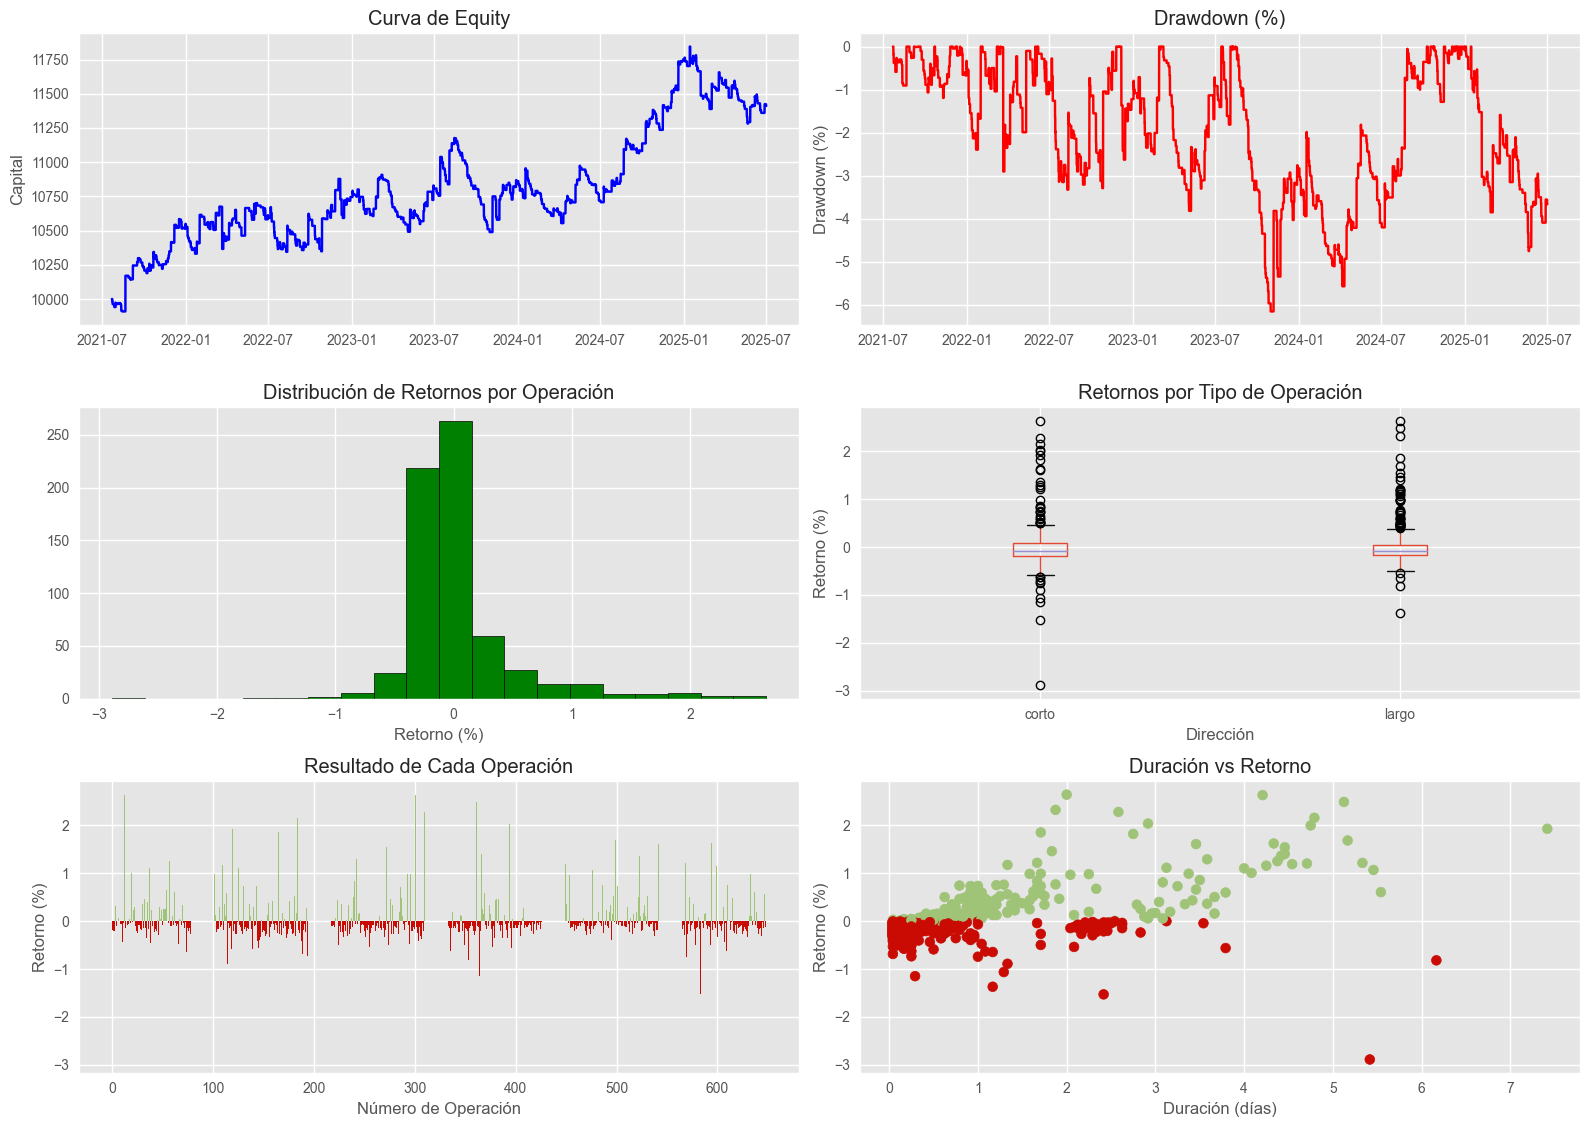

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Indicadores
def ema(series, period):
    return series.ewm(span=period, adjust=False).mean()

def rsi(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=period, min_periods=period).mean()
    avg_loss = loss.rolling(window=period, min_periods=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Estrategia
def estrategia_triple_ema_scalping_unico_df(df_1h):
    if not pd.api.types.is_datetime64_any_dtype(df_1h.index):
        raise ValueError("El índice del DataFrame debe ser datetime64")

    df_1h = df_1h.sort_index()
    
    # Parámetros optimizados
    ema_fast = 3
    ema_mid = 20
    ema_slow = 50
    rsi_threshold = 52.0
    threshold = 0.0010

    # 4H para contexto de tendencia
    df_4h = df_1h['close'].resample('4H').last().dropna().to_frame()
    df_4h['EMA_fast'] = ema(df_4h['close'], ema_fast)
    df_4h['EMA_mid'] = ema(df_4h['close'], ema_mid)
    df_4h['EMA_slow'] = ema(df_4h['close'], ema_slow)

    def tendencia(row):
        if (row['EMA_fast'] > row['EMA_mid']) and (row['EMA_mid'] > row['EMA_slow']):
            return 'largo'
        elif (row['EMA_fast'] < row['EMA_mid']) and (row['EMA_mid'] < row['EMA_slow']):
            return 'corto'
        else:
            return 'neutral'

    df_4h['tendencia'] = df_4h.apply(tendencia, axis=1)
    df_4h_tendencia_1h = df_4h['tendencia'].resample('1H').ffill()

    # Indicadores 1H
    df_1h['EMA_fast'] = ema(df_1h['close'], ema_fast)
    df_1h['EMA_mid'] = ema(df_1h['close'], ema_mid)
    df_1h['EMA_slow'] = ema(df_1h['close'], ema_slow)
    df_1h['RSI14'] = rsi(df_1h['close'], 14)

    df_1h = df_1h.join(df_4h_tendencia_1h.rename('tendencia'), how='left')

    def check_retroceso(row):
        if pd.isna(row['EMA_mid']) or pd.isna(row['RSI14']) or row['tendencia'] == 'neutral':
            return 'sin señal'
        retroceso = abs(row['close'] - row['EMA_mid']) / row['EMA_mid'] <= threshold
        if row['tendencia'] == 'largo' and retroceso and row['RSI14'] > rsi_threshold:
            return 'entrada_largo'
        elif row['tendencia'] == 'corto' and retroceso and row['RSI14'] < (100 - rsi_threshold):
            return 'entrada_corto'
        else:
            return 'sin señal'

    df_1h['señal'] = df_1h.apply(check_retroceso, axis=1)
    return df_1h

# Backtest
def backtest_estrategia(df):
    capital_inicial = 10000
    capital = capital_inicial
    position = None
    entry_price = 0
    trades = []

    for i in range(1, len(df)):
        row = df.iloc[i]
        prev = df.iloc[i - 1]

        if position is None:
            if row['señal'] == 'entrada_largo':
                position = 'largo'
                entry_price = row['close']
                entry_time = row.name
            elif row['señal'] == 'entrada_corto':
                position = 'corto'
                entry_price = row['close']
                entry_time = row.name

        elif position == 'largo':
            if prev['EMA_fast'] > prev['EMA_mid'] and row['EMA_fast'] < row['EMA_mid']:
                exit_price = row['close']
                exit_time = row.name
                retorno = (exit_price - entry_price) / entry_price
                trades.append({'entrada': entry_time, 'salida': exit_time, 'direction': 'largo',
                               'entry_price': entry_price, 'exit_price': exit_price,
                               'retorno_pct': retorno * 100,
                               'duracion': (exit_time - entry_time).total_seconds() / 3600 / 24})
                position = None

        elif position == 'corto':
            if prev['EMA_fast'] < prev['EMA_mid'] and row['EMA_fast'] > row['EMA_mid']:
                exit_price = row['close']
                exit_time = row.name
                retorno = (entry_price - exit_price) / entry_price
                trades.append({'entrada': entry_time, 'salida': exit_time, 'direction': 'corto',
                               'entry_price': entry_price, 'exit_price': exit_price,
                               'retorno_pct': retorno * 100,
                               'duracion': (exit_time - entry_time).total_seconds() / 3600 / 24})
                position = None

    if position is not None:
        last_row = df.iloc[-1]
        exit_price = last_row['close']
        exit_time = last_row.name
        retorno = (exit_price - entry_price) / entry_price if position == 'largo' else (entry_price - exit_price) / entry_price
        trades.append({'entrada': entry_time, 'salida': exit_time, 'direction': position,
                       'entry_price': entry_price, 'exit_price': exit_price,
                       'retorno_pct': retorno * 100,
                       'duracion': (exit_time - entry_time).total_seconds() / 3600 / 24})

    trades_df = pd.DataFrame(trades)

    # ➕ Cálculo de retroceso y avance para ganadoras
    drawdown_runup_data = []

    for _, trade in trades_df.iterrows():
        if trade['retorno_pct'] <= 0:
            drawdown_runup_data.append({
                'max_drawdown_pct': np.nan,
                'max_runup_pct': np.nan,
                'velas_hasta_drawdown': np.nan,
                'velas_hasta_runup': np.nan
            })
            continue

        sub_df = df.loc[trade['entrada']:trade['salida']].copy()
        precios = sub_df['close'].values
        entry_price = trade['entry_price']

        retornos = (precios - entry_price) / entry_price * 100 if trade['direction'] == 'largo' else (entry_price - precios) / entry_price * 100

        max_drawdown_pct = retornos.min()
        max_runup_pct = retornos.max()
        idx_drawdown = retornos.argmin()
        idx_runup = retornos.argmax()

        drawdown_runup_data.append({
            'max_drawdown_pct': max_drawdown_pct,
            'max_runup_pct': max_runup_pct,
            'velas_hasta_drawdown': idx_drawdown,
            'velas_hasta_runup': idx_runup
        })

    extra_metrics_df = pd.DataFrame(drawdown_runup_data)
    trades_df = pd.concat([trades_df.reset_index(drop=True), extra_metrics_df], axis=1)

    # ✅ Métricas estándar (como antes)
    total_operaciones = len(trades_df)
    tasa_ganancia = (trades_df['retorno_pct'] > 0).mean() * 100 if total_operaciones else 0
    retorno_promedio = trades_df['retorno_pct'].mean() if total_operaciones else 0
    mejor = trades_df['retorno_pct'].max() if total_operaciones else 0
    peor = trades_df['retorno_pct'].min() if total_operaciones else 0
    ganancias = trades_df.loc[trades_df['retorno_pct'] > 0, 'retorno_pct'].sum()
    perdidas = -trades_df.loc[trades_df['retorno_pct'] < 0, 'retorno_pct'].sum()
    profit_factor = ganancias / perdidas if perdidas != 0 else np.inf
    expectativa = retorno_promedio * tasa_ganancia / 100

    # Curva de equity
    df_bt = pd.DataFrame(index=df.index)
    df_bt['equity'] = capital_inicial
    for _, trade in trades_df.iterrows():
        idx_salida = df_bt.index.get_loc(trade['salida'], method='nearest')
        retorno_decimal = trade['retorno_pct'] / 100
        df_bt.iloc[idx_salida:] *= (1 + retorno_decimal)

    df_bt['max_equity'] = df_bt['equity'].cummax()
    df_bt['drawdown'] = (df_bt['equity'] - df_bt['max_equity']) / df_bt['max_equity']
    max_drawdown = df_bt['drawdown'].min() * 100
    retorno_acumulado = (df_bt['equity'].iloc[-1] / capital_inicial - 1) * 100

    # 🧾 Resumen
    print("\nResumen del Backtest")
    print("─" * 60)
    print(f"│ Total de Operaciones       │        {total_operaciones:12} │")
    print(f"│ Tasa de Ganancia           │           {tasa_ganancia:6.2f}% │")
    print(f"│ Retorno Promedio (%)       │           {retorno_promedio:6.2f}% │")
    print(f"│ Mejor Operación (%)        │           {mejor:6.2f}% │")
    print(f"│ Peor Operación (%)         │           {peor:6.2f}% │")
    print(f"│ Profit Factor              │             {profit_factor:6.2f} │")
    print(f"│ Expectativa Matemática     │           {expectativa:6.2f}% │")
    print(f"│ Máximo Drawdown (%)        │           {max_drawdown:6.2f}% │")
    print(f"│ Retorno Acumulado (%)      │           {retorno_acumulado:6.2f}% │")
    print("─" * 60)

    # Análisis adicional sobre retroceso/avance en ganadoras
    ganadoras = trades_df[trades_df['retorno_pct'] > 0]
    if not ganadoras.empty:
        print("\n📉 Análisis de Retrocesos y Avances en Ganadoras")
        print("─" * 60)
        print(f"Máx. retroceso entre ganadoras (%)    : {ganadoras['max_drawdown_pct'].min():.2f}")
        print(f"Prom. retroceso entre ganadoras (%)   : {ganadoras['max_drawdown_pct'].mean():.2f}")
        print(f"Máx. avance entre ganadoras (%)       : {ganadoras['max_runup_pct'].max():.2f}")
        print(f"Prom. avance entre ganadoras (%)      : {ganadoras['max_runup_pct'].mean():.2f}")
        print(f"Prom. velas hasta retroceso máx.      : {ganadoras['velas_hasta_drawdown'].mean():.2f}")
        print(f"Prom. velas hasta avance máx.         : {ganadoras['velas_hasta_runup'].mean():.2f}")
        print("─" * 60)
        
    # Graficar resultados
    plt.style.use('ggplot')
    fig, axs = plt.subplots(3, 2, figsize=(16, 12))
    fig.suptitle('Análisis de Desempeño del Sistema de Trading', fontsize=16)

    # Curva de equity
    axs[0, 0].plot(df_bt.index, df_bt['equity'], color='blue')
    axs[0, 0].set_title('Curva de Equity')
    axs[0, 0].set_ylabel('Capital')
    axs[0, 0].grid(True)

    # Drawdown
    axs[0, 1].plot(df_bt.index, df_bt['drawdown'] * 100, color='red')
    axs[0, 1].set_title('Drawdown (%)')
    axs[0, 1].set_ylabel('Drawdown (%)')
    axs[0, 1].grid(True)

    # Histograma de retornos
    if not trades_df.empty:
        axs[1, 0].hist(trades_df['retorno_pct'], bins=20, color='green', edgecolor='black')
        axs[1, 0].set_title('Distribución de Retornos por Operación')
        axs[1, 0].set_xlabel('Retorno (%)')
        axs[1, 0].grid(True)

    # Boxplot por dirección
    if not trades_df.empty and 'direction' in trades_df.columns:
        trades_df.boxplot(column='retorno_pct', by='direction', ax=axs[1, 1])
        axs[1, 1].set_title('Retornos por Tipo de Operación')
        axs[1, 1].set_xlabel('Dirección')
        axs[1, 1].set_ylabel('Retorno (%)')
        plt.suptitle('')

    # Barra por operación
    if not trades_df.empty:
        axs[2, 0].bar(range(len(trades_df)), trades_df['retorno_pct'],
                      color=np.where(trades_df['retorno_pct'] > 0, 'g', 'r'))
        axs[2, 0].set_title('Resultado de Cada Operación')
        axs[2, 0].set_xlabel('Número de Operación')
        axs[2, 0].set_ylabel('Retorno (%)')
        axs[2, 0].grid(True)

    # Scatter duración vs retorno
    if not trades_df.empty:
        axs[2, 1].scatter(trades_df['duracion'], trades_df['retorno_pct'],
                          c=np.where(trades_df['retorno_pct'] > 0, 'g', 'r'))
        axs[2, 1].set_title('Duración vs Retorno')
        axs[2, 1].set_xlabel('Duración (días)')
        axs[2, 1].set_ylabel('Retorno (%)')
        axs[2, 1].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    return trades_df, df_bt

# Carga y ejecución (asegúrate de tener tu df_1h)
# df_1h = pd.read_csv('datos_1h.csv', parse_dates=['time'])
# df_1h.set_index('time', inplace=True)
df_estrategia = estrategia_triple_ema_scalping_unico_df(df_1h)
trades, df_bt = backtest_estrategia(df_estrategia)
# --- Etiquetar en el DataFrame original si fue ganadora o perdedora ---
df_estrategia['resultado_operacion'] = np.nan

for _, trade in trades.iterrows():
    mask = (df_estrategia.index >= trade['entrada']) & (df_estrategia.index <= trade['salida'])
    df_estrategia.loc[mask, 'resultado_operacion'] = 'ganadora' if trade['retorno_pct'] > 0 else 'perdedora'


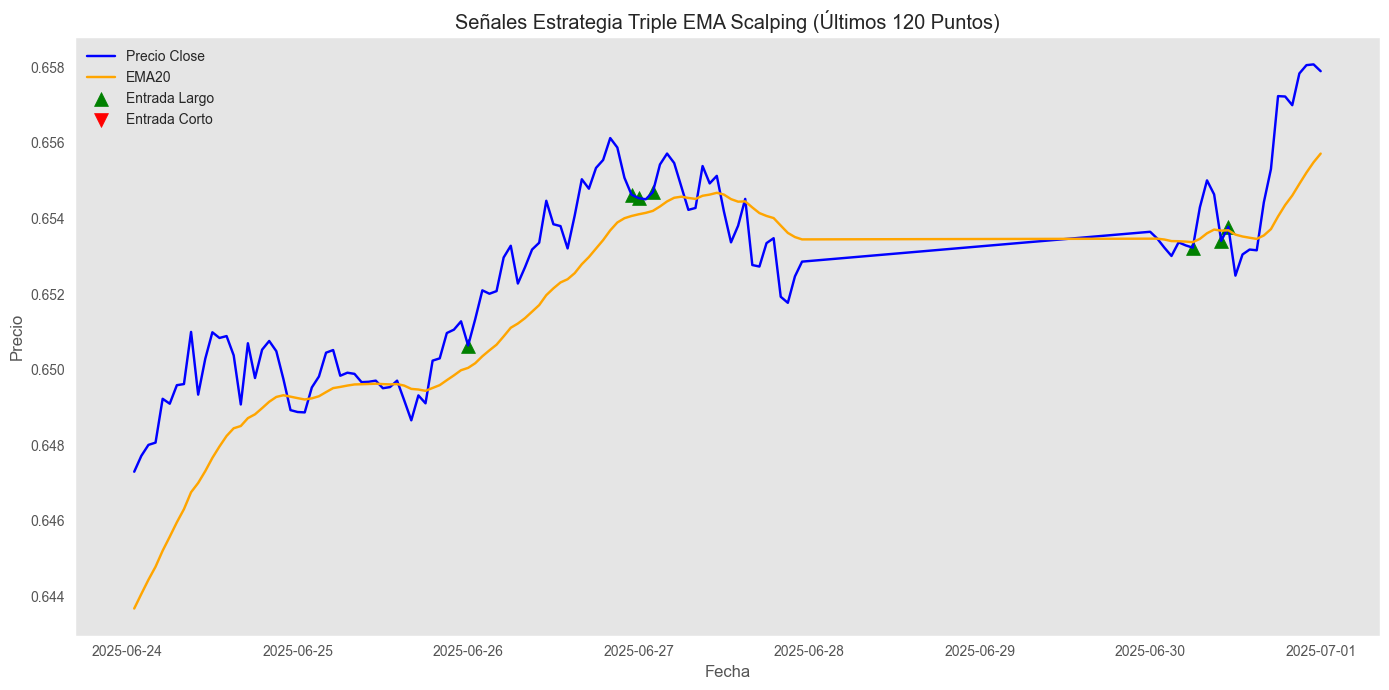

In [10]:
def graficar_ultimas_senales(df):
    df_last = df.tail(120)

    plt.figure(figsize=(14, 7))
    plt.plot(df_last.index, df_last['close'], label='Precio Close', color='blue')
    plt.plot(df_last.index, df_last['EMA_mid'], label='EMA20', color='orange')

    largos = df_last[df_last['señal'] == 'entrada_largo']
    cortos = df_last[df_last['señal'] == 'entrada_corto']

    plt.scatter(largos.index, largos['close'], marker='^', color='green', label='Entrada Largo', s=100)
    plt.scatter(cortos.index, cortos['close'], marker='v', color='red', label='Entrada Corto', s=100)

    plt.title('Señales Estrategia Triple EMA Scalping (Últimos 120 Puntos)')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# 2. Graficar últimos 120 puntos con señales
graficar_ultimas_senales(df_estrategia)

In [11]:
df_estrategia['resultado_operacion'] = df_estrategia['resultado_operacion'].map({'ganadora': 1, 'perdedora': 0}).fillna(0).astype(int)
df_estrategia

,open,high,low,close,tick_volume,spread,real_volume,hour,day,month,year,EMA_fast,EMA_mid,EMA_slow,RSI14,tendencia,señal,resultado_operacion
time,,,,,,,,,,,,,,,,,,
2021-07-22 00:00:00,0.73554,0.73612,0.73364,0.73580,236,7,0,0,22,7,2021,0.735800,0.735800,0.735800,NaN,neutral,sin señal,0
2021-07-22 01:00:00,0.73580,0.73583,0.73543,0.73570,435,0,0,1,22,7,2021,0.735750,0.735790,0.735796,NaN,neutral,sin señal,0
2021-07-22 02:00:00,0.73570,0.73581,0.73502,0.73516,545,0,0,2,22,7,2021,0.735455,0.735730,0.735771,NaN,neutral,sin señal,0
2021-07-22 03:00:00,0.73515,0.73527,0.73441,0.73454,1121,0,0,3,22,7,2021,0.734997,0.735617,0.735723,NaN,neutral,sin señal,0
2021-07-22 04:00:00,0.73455,0.73505,0.73422,0.73503,1731,0,0,4,22,7,2021,0.735014,0.735561,0.735696,NaN,largo,sin señal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-30 20:00:00,0.65723,0.65766,0.65679,0.65700,5009,0,0,20,30,6,2025,0.656781,0.654609,0.653847,68.718967,largo,sin señal,0
2025-06-30 21:00:00,0.65700,0.65797,0.65693,0.65784,4666,0,0,21,30,6,2025,0.657311,0.654917,0.654004,67.987805,largo,sin señal,0
2025-06-30 22:00:00,0.65784,0.65822,0.65768,0.65806,3271,0,0,22,30,6,2025,0.657685,0.655216,0.654163,66.310160,largo,sin señal,0


In [12]:
valores_unicos = df_estrategia['señal'].unique()
print(valores_unicos)

['sin señal' 'entrada_largo' 'entrada_corto']


In [13]:
data=df_estrategia

In [14]:
from pycaret.classification import *
s = setup(data, target = 'resultado_operacion', session_id = 123, fix_imbalance=True)

,Description,Value
0,Session id,123
1,Target,resultado_operacion
2,Target type,Binary
3,Original data shape,"(24541, 18)"
4,Transformed data shape,"(33299, 22)"
5,Transformed train set shape,"(25936, 22)"
6,Transformed test set shape,"(7363, 22)"
7,Numeric features,15
8,Categorical features,2
9,Rows with missing values,0.1%


In [15]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9486,0.9836,0.8990,0.8923,0.8955,0.8614,0.8616,1.5090
xgboost,Extreme Gradient Boosting,0.9324,0.9747,0.8435,0.8763,0.8594,0.8150,0.8154,0.6940
rf,Random Forest Classifier,0.9276,0.9735,0.8470,0.8564,0.8515,0.8037,0.8038,2.8680
lightgbm,Light Gradient Boosting Machine,0.9065,0.9562,0.7739,0.8329,0.8021,0.7410,0.7420,0.7710
dt,Decision Tree Classifier,0.8858,0.8534,0.7898,0.7560,0.7724,0.6963,0.6967,0.3510
gbc,Gradient Boosting Classifier,0.8020,0.8524,0.6466,0.5875,0.6155,0.4826,0.4837,6.1970
dummy,Dummy Classifier,0.7549,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2350
ada,Ada Boost Classifier,0.7130,0.7463,0.5093,0.4284,0.4651,0.2710,0.2731,1.5360
qda,Quadratic Discriminant Analysis,0.7038,0.5298,0.1582,0.3001,0.1853,0.0475,0.0565,0.2860
nb,Naive Bayes,0.6068,0.7189,0.7501,0.3565,0.4830,0.2259,0.2675,0.2590


In [16]:
boosted = ensemble_model(best, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9470,0.9844,0.9097,0.8784,0.8938,0.8585,0.8588
1,0.9476,0.9828,0.9074,0.8822,0.8946,0.8598,0.8599
2,0.9517,0.9829,0.9050,0.8986,0.9018,0.8697,0.8698
3,0.9459,0.9806,0.9121,0.8727,0.8920,0.8559,0.8563
4,0.9552,0.9871,0.9097,0.9076,0.9087,0.8790,0.8790
5,0.9540,0.9868,0.9169,0.8977,0.9072,0.8766,0.8767
6,0.9435,0.9811,0.8765,0.8913,0.8838,0.8465,0.8466
7,0.9488,0.9835,0.8717,0.9152,0.8929,0.8593,0.8597
8,0.9406,0.9831,0.8860,0.8735,0.8797,0.8403,0.8403


In [17]:
print(boosted)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100, n_jobs=-1,
         

In [18]:
evaluate_model(boosted)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

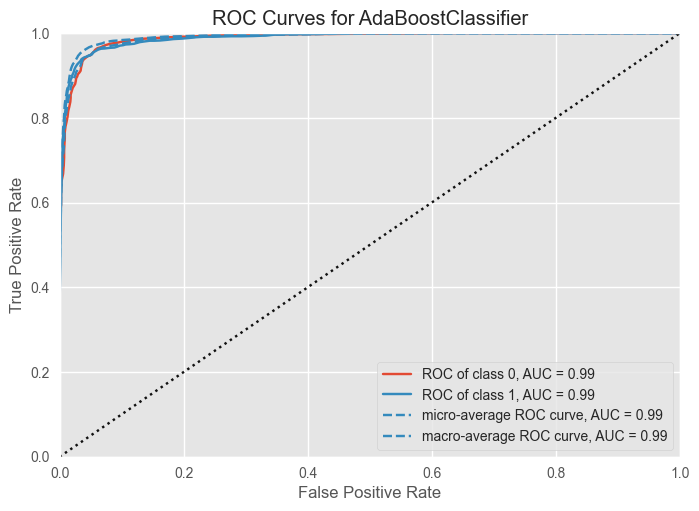

In [19]:
plot_model(boosted, plot = 'auc')

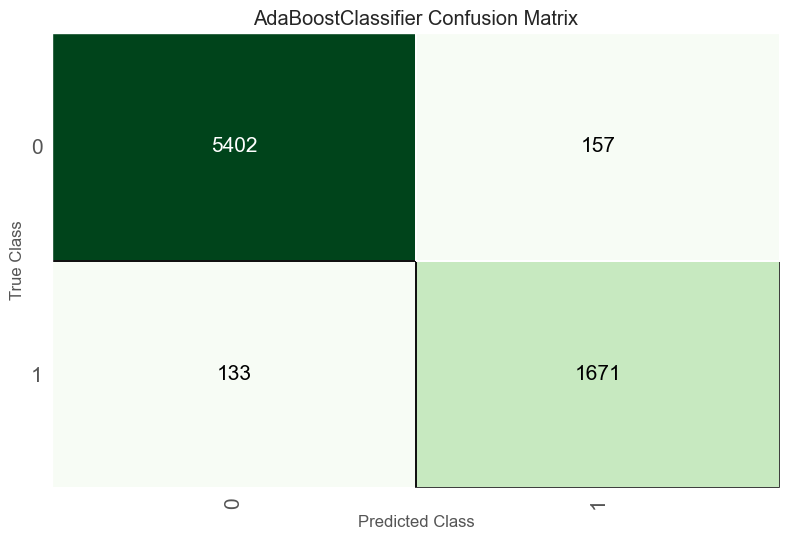

In [20]:
plot_model(boosted, plot = 'confusion_matrix')

In [21]:
predict_model(boosted)

,open,high,low,close,tick_volume,spread,real_volume,hour,day,month,year,EMA_fast,EMA_mid,EMA_slow,RSI14,tendencia,señal,resultado_operacion,prediction_label,prediction_score
time,,,,,,,,,,,,,,,,,,,,
2025-01-09 10:00:00,0.61815,0.61943,0.61719,0.61938,8777,1,0,10,9,1,2025,0.619178,0.620394,0.621723,38.971809,corto,sin señal,1,1,0.86
2023-04-19 21:00:00,0.67171,0.67216,0.67133,0.67152,1952,0,0,21,19,4,2023,0.671689,0.671824,0.671976,39.295391,neutral,sin señal,0,0,1.00
2023-10-17 15:00:00,0.63618,0.63640,0.63366,0.63413,12342,0,0,15,17,10,2023,0.634878,0.634650,0.634082,53.013393,corto,sin señal,0,0,0.96
2022-09-01 06:00:00,0.68137,0.68168,0.67967,0.68036,2317,0,0,6,1,9,2022,0.680975,0.683922,0.686115,16.644650,corto,sin señal,0,0,0.85
2021-12-22 19:00:00,0.72138,0.72201,0.72131,0.72179,1548,0,0,19,22,12,2021,0.721053,0.716850,0.714949,93.844604,largo,sin señal,0,0,0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-06 02:00:00,0.70172,0.70177,0.70065,0.70159,1616,0,0,2,6,12,2021,0.701228,0.702988,0.706253,34.086956,corto,sin señal,1,1,1.00
2024-12-17 23:00:00,0.63343,0.63382,0.63328,0.63358,1543,3,0,23,17,12,2024,0.633587,0.634524,0.635531,33.846153,corto,sin señal,1,1,0.96
2022-03-09 22:00:00,0.73188,0.73310,0.73178,0.73257,2330,0,0,22,9,3,2022,0.732240,0.731163,0.730997,75.295509,largo,sin señal,0,0,0.88


In [22]:
#df_estrategia['resultaddo_operacion'] = df_estrategia['resultado_operacion'].fillna(0).astype(int)
predictions = predict_model(boosted, data=df_estrategia)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9882,0.9990,0.9779,0.9740,0.9759,0.9681,0.9681


,open,high,low,close,tick_volume,spread,real_volume,hour,day,month,year,EMA_fast,EMA_mid,EMA_slow,RSI14,tendencia,señal,resultado_operacion,prediction_label,prediction_score
time,,,,,,,,,,,,,,,,,,,,
2021-07-22 00:00:00,0.73554,0.73612,0.73364,0.73580,236,7,0,0,22,7,2021,0.735800,0.735800,0.735800,NaN,neutral,sin señal,0,0,1.0
2021-07-22 01:00:00,0.73580,0.73583,0.73543,0.73570,435,0,0,1,22,7,2021,0.735750,0.735790,0.735796,NaN,neutral,sin señal,0,0,1.0
2021-07-22 02:00:00,0.73570,0.73581,0.73502,0.73516,545,0,0,2,22,7,2021,0.735455,0.735730,0.735771,NaN,neutral,sin señal,0,0,1.0
2021-07-22 03:00:00,0.73515,0.73527,0.73441,0.73454,1121,0,0,3,22,7,2021,0.734998,0.735617,0.735723,NaN,neutral,sin señal,0,0,1.0
2021-07-22 04:00:00,0.73455,0.73505,0.73422,0.73503,1731,0,0,4,22,7,2021,0.735014,0.735561,0.735696,NaN,largo,sin señal,0,0,1.0


In [23]:
import pandas as pd

# Crear una nueva columna para identificar aciertos (1 si predicción y resultado coinciden, 0 si no)
predictions['acierto'] = (predictions['prediction_label'] == predictions['resultado_operacion']).astype(int)

# Calcular el porcentaje de aciertos por categoría (0, 1, 2)
porcentaje_aciertos_por_categoria = predictions.groupby('resultado_operacion')['acierto'].mean() * 100

# Calcular el porcentaje de aciertos globales
porcentaje_aciertos_global = predictions['acierto'].mean() * 100

# Mostrar los resultados
print("Porcentaje de aciertos por categoría:")
print(porcentaje_aciertos_por_categoria)

print("\nPorcentaje de aciertos global:")
print(f"{porcentaje_aciertos_global:.2f}%")


Porcentaje de aciertos por categoría:
resultado_operacion
0    99.152588
1    97.788494
Name: acierto, dtype: float64

Porcentaje de aciertos global:
98.82%


In [24]:
nombre_modelo = 'boosted_my_best_pipeline'
save_model(boosted, nombre_modelo)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['open', 'high', 'low', 'close',
                                              'tick_volume', 'spread',
                                              'real_volume', 'hour', 'day',
                                              'month', 'year', 'EMA_fast',
                                              'EMA_mid', 'EMA_slow', 'RSI14'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_val...
                                                                    class_weight=None


Resumen del Backtest
────────────────────────────────────────────────────────────
│ Total de Operaciones       │                 198 │
│ Tasa de Ganancia           │            80.81% │
│ Retorno Promedio (%)       │             0.34% │
│ Mejor Operación (%)        │             3.17% │
│ Peor Operación (%)         │            -1.88% │
│ Profit Factor              │               4.92 │
│ Expectativa Matemática     │             0.27% │
│ Máximo Drawdown (%)        │            -1.88% │
│ Retorno Acumulado (%)      │            93.22% │
────────────────────────────────────────────────────────────

📉 Análisis de Retrocesos y Avances en Ganadoras
────────────────────────────────────────────────────────────
Máx. retroceso entre ganadoras (%)    : -2.35
Prom. retroceso entre ganadoras (%)   : -0.07
Máx. avance entre ganadoras (%)       : 3.46
Prom. avance entre ganadoras (%)      : 0.93
Prom. velas hasta retroceso máx.      : 1.57
Prom. velas hasta avance máx.         : 21.52
───────────

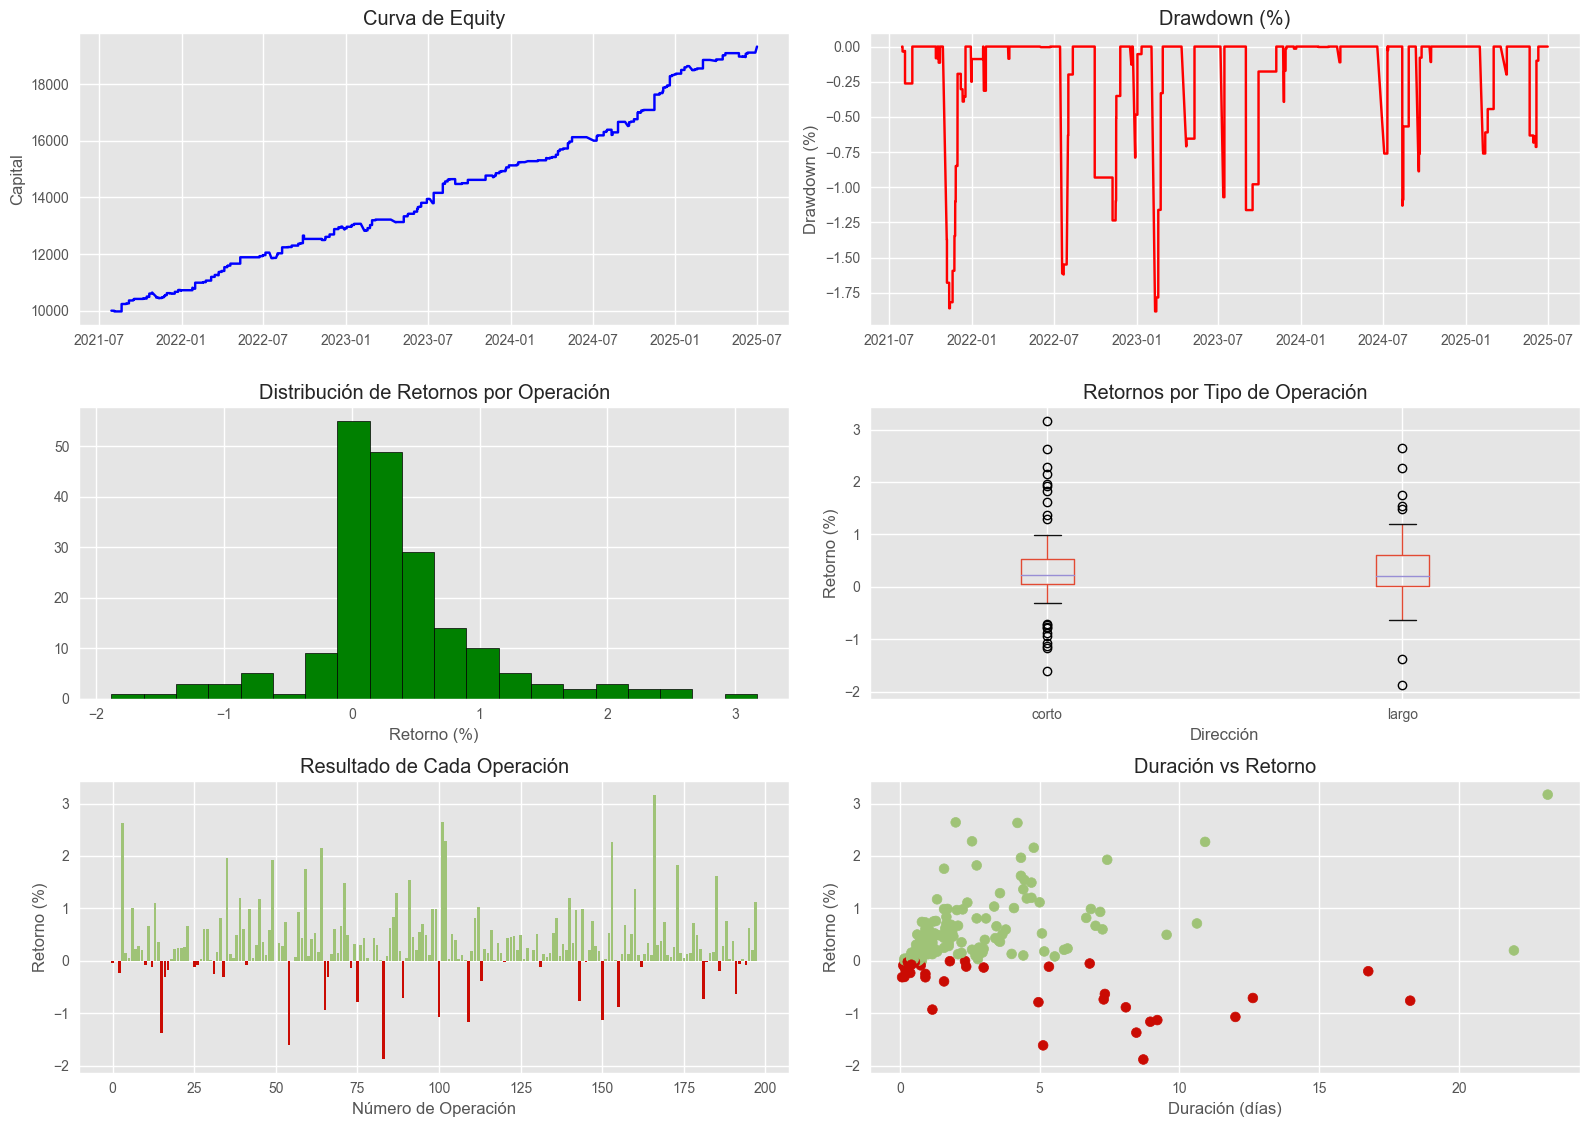

In [25]:
# Filtrar solo las señales con prediction_label == 1
df_filtrado = predictions[predictions['prediction_label'] == 1].copy()

# Ejecutar el backtest con el dataframe filtrado
trades_df, df_bt = backtest_estrategia(df_filtrado)


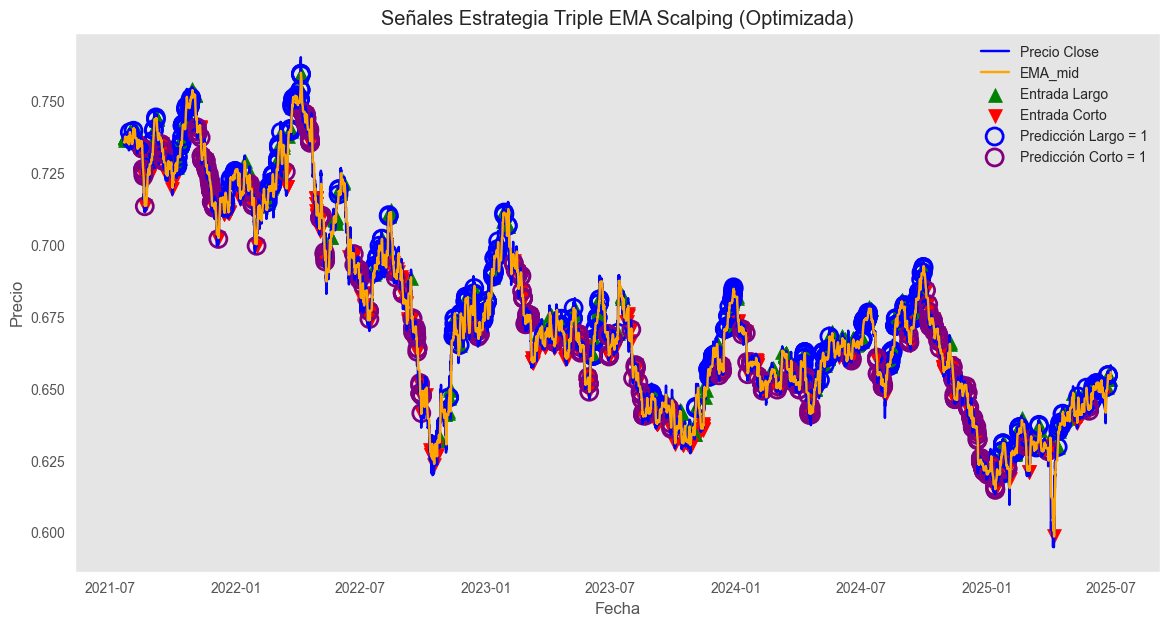

In [26]:
def graficar_senales_predictions(df):
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['close'], label='Precio Close', color='blue')
    plt.plot(df.index, df['EMA_mid'], label='EMA_mid', color='orange')

    largos = df[df['señal'] == 'entrada_largo']
    cortos = df[df['señal'] == 'entrada_corto']

    # Señales normales
    plt.scatter(largos.index, largos['close'], marker='^', color='green', label='Entrada Largo', s=100)
    plt.scatter(cortos.index, cortos['close'], marker='v', color='red', label='Entrada Corto', s=100)

    # Señales donde prediction_label == 1 (sobrepuestas)
    pred_largos = largos[largos['prediction_label'] == 1]
    pred_cortos = cortos[cortos['prediction_label'] == 1]

    plt.scatter(pred_largos.index, pred_largos['close'], 
                marker='o', facecolors='none', edgecolors='blue', s=150, linewidths=2, label='Predicción Largo = 1')
    plt.scatter(pred_cortos.index, pred_cortos['close'], 
                marker='o', facecolors='none', edgecolors='purple', s=150, linewidths=2, label='Predicción Corto = 1')

    plt.title('Señales Estrategia Triple EMA Scalping (Optimizada)')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend()
    plt.grid()
    plt.show()

graficar_senales_predictions(predictions)

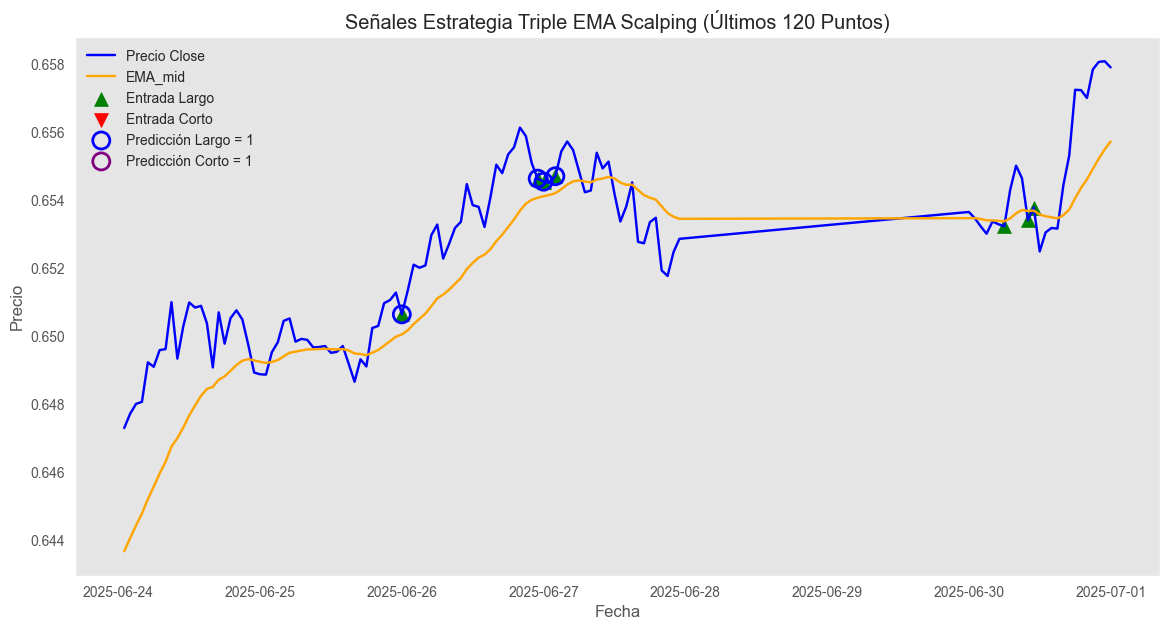

In [27]:
def graficar_senales_ultimos_120(df):
    df_ultimos = df.tail(120)  # Tomar últimos 120 registros
    plt.figure(figsize=(14, 7))
    plt.plot(df_ultimos.index, df_ultimos['close'], label='Precio Close', color='blue')
    plt.plot(df_ultimos.index, df_ultimos['EMA_mid'], label='EMA_mid', color='orange')

    largos = df_ultimos[df_ultimos['señal'] == 'entrada_largo']
    cortos = df_ultimos[df_ultimos['señal'] == 'entrada_corto']

    plt.scatter(largos.index, largos['close'], marker='^', color='green', label='Entrada Largo', s=100)
    plt.scatter(cortos.index, cortos['close'], marker='v', color='red', label='Entrada Corto', s=100)

    pred_largos = largos[largos['prediction_label'] == 1]
    pred_cortos = cortos[cortos['prediction_label'] == 1]

    plt.scatter(pred_largos.index, pred_largos['close'], 
                marker='o', facecolors='none', edgecolors='blue', s=150, linewidths=2, label='Predicción Largo = 1')
    plt.scatter(pred_cortos.index, pred_cortos['close'], 
                marker='o', facecolors='none', edgecolors='purple', s=150, linewidths=2, label='Predicción Corto = 1')

    plt.title('Señales Estrategia Triple EMA Scalping (Últimos 120 Puntos)')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend()
    plt.grid()
    plt.show()

graficar_senales_ultimos_120(predictions)

In [28]:
R

NameError: name 'R' is not defined

In [ ]:
print(df['adx'].describe())
print(df['adx'].dropna().head())


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Parámetros del backtest ---
HOLD_DAYS = 5
CAPITAL_INICIAL = 10000

# --- Identificar señales ---
df['signal'] = np.where(df['long_signal'], 1, np.where(df['short_signal'], -1, 0))

# --- Crear lista de operaciones ---
trades = []
trades = []
i = 0
while i < len(df) - HOLD_DAYS:
    row = df.iloc[i]
    if row['signal'] != 0:
        entry_price = row['close']
        exit_price = df.iloc[i + HOLD_DAYS]['close']
        direction = 'long' if row['signal'] == 1 else 'short'
        retorno_pct = ((exit_price - entry_price) / entry_price * 100) if direction == 'long' else ((entry_price - exit_price) / entry_price * 100)
        trades.append({
            'fecha_entrada': df.index[i],
            'fecha_salida': df.index[i + HOLD_DAYS],
            'entry_price': entry_price,
            'exit_price': exit_price,
            'direction': direction,
            'retorno_pct': retorno_pct,
            'duracion': HOLD_DAYS
        })
        i += HOLD_DAYS  # Saltar HOLD_DAYS para evitar solapamiento
    else:
        i += 1
        
for i in range(len(df) - HOLD_DAYS):
    row = df.iloc[i]
    if row['signal'] != 0:
        entry_price = row['close']
        exit_price = df.iloc[i + HOLD_DAYS]['close']
        direction = 'long' if row['signal'] == 1 else 'short'
        if direction == 'long':
            retorno_pct = (exit_price - entry_price) / entry_price * 100
        else:
            retorno_pct = (entry_price - exit_price) / entry_price * 100
        trades.append({
            'fecha_entrada': df.index[i],
            'fecha_salida': df.index[i + HOLD_DAYS],
            'entry_price': entry_price,
            'exit_price': exit_price,
            'direction': direction,
            'retorno_pct': retorno_pct,
            'duracion': HOLD_DAYS
        })

trades = pd.DataFrame(trades)

# --- Equity Curve ---
df_bt = pd.DataFrame(index=df.index)
df_bt['equity'] = CAPITAL_INICIAL
equity = CAPITAL_INICIAL

for i in range(len(trades)):
    equity *= (1 + trades.iloc[i]['retorno_pct'] / 100)
    fecha = trades.iloc[i]['fecha_salida']
    df_bt.loc[fecha:, 'equity'] = equity

df_bt['equity'].ffill(inplace=True)

# --- Drawdown ---
df_bt['max_equity'] = df_bt['equity'].cummax()
df_bt['drawdown'] = (df_bt['equity'] - df_bt['max_equity']) / df_bt['max_equity']

# --- Métricas ---
total_operaciones = len(trades)
ganadoras = trades[trades['retorno_pct'] > 0]
perdedoras = trades[trades['retorno_pct'] <= 0]
tasa_ganancia = 100 * len(ganadoras) / total_operaciones if total_operaciones > 0 else 0
retorno_promedio = trades['retorno_pct'].mean() if total_operaciones > 0 else 0
mejor = trades['retorno_pct'].max() if total_operaciones > 0 else 0
peor = trades['retorno_pct'].min() if total_operaciones > 0 else 0
ganancia_total = ganadoras['retorno_pct'].sum()
perdida_total = abs(perdedoras['retorno_pct'].sum()) if len(perdedoras) > 0 else 1e-9
profit_factor = ganancia_total / perdida_total if perdida_total != 0 else np.nan
expectativa = (tasa_ganancia / 100) * ganadoras['retorno_pct'].mean() + ((1 - tasa_ganancia / 100) * perdedoras['retorno_pct'].mean())
max_drawdown = df_bt['drawdown'].min() * 100
retorno_acumulado = (df_bt['equity'].iloc[-1] / CAPITAL_INICIAL - 1) * 100

# --- Mostrar resumen ---
print("\nResumen del Backtest")
print("─" * 60)
print(f"│ Total de Operaciones       │        {total_operaciones:12} │")
print(f"│ Tasa de Ganancia           │           {tasa_ganancia:6.2f}% │")
print(f"│ Retorno Promedio (%)       │           {retorno_promedio:6.2f}% │")
print(f"│ Mejor Operación (%)        │           {mejor:6.2f}% │")
print(f"│ Peor Operación (%)         │           {peor:6.2f}% │")
print(f"│ Profit Factor              │             {profit_factor:6.2f} │")
print(f"│ Expectativa Matemática     │           {expectativa:6.2f}% │")
print(f"│ Máximo Drawdown (%)        │           {max_drawdown:6.2f}% │")
print(f"│ Retorno Acumulado (%)      │           {retorno_acumulado:6.2f}% │")
print("─" * 60)

# --- Graficar ---
plt.style.use('ggplot')
fig, axs = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Análisis de Desempeño del Sistema de Trading', fontsize=16)

axs[0, 0].plot(df_bt.index, df_bt['equity'], color='blue')
axs[0, 0].set_title('Curva de Equity')
axs[0, 0].set_ylabel('Capital')
axs[0, 0].grid(True)

axs[0, 1].plot(df_bt.index, df_bt['drawdown'] * 100, color='red')
axs[0, 1].set_title('Drawdown (%)')
axs[0, 1].set_ylabel('Drawdown (%)')
axs[0, 1].grid(True)

if not trades.empty:
    axs[1, 0].hist(trades['retorno_pct'], bins=20, color='green', edgecolor='black')
    axs[1, 0].set_title('Distribución de Retornos por Operación')
    axs[1, 0].set_xlabel('Retorno (%)')
    axs[1, 0].grid(True)

if not trades.empty and 'direction' in trades.columns:
    trades.boxplot(column='retorno_pct', by='direction', ax=axs[1, 1])
    axs[1, 1].set_title('Retornos por Tipo de Operación')
    axs[1, 1].set_xlabel('Dirección')
    axs[1, 1].set_ylabel('Retorno (%)')
    plt.suptitle('')

if not trades.empty:
    axs[2, 0].bar(range(len(trades)), trades['retorno_pct'],
                  color=np.where(trades['retorno_pct'] > 0, 'g', 'r'))
    axs[2, 0].set_title('Resultado de Cada Operación')
    axs[2, 0].set_xlabel('Número de Operación')
    axs[2, 0].set_ylabel('Retorno (%)')
    axs[2, 0].grid(True)

if not trades.empty:
    axs[2, 1].scatter(trades['duracion'], trades['retorno_pct'],
                      c=np.where(trades['retorno_pct'] > 0, 'g', 'r'))
    axs[2, 1].set_title('Duración vs Retorno')
    axs[2, 1].set_xlabel('Duración (días)')
    axs[2, 1].set_ylabel('Retorno (%)')
    axs[2, 1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
r

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def backtest_estrategia(df, niveles_sr, CAPITAL_INICIAL=10000, RISK_POR_TRADE=0.01, MAX_HOLDING=20, verbose=True):
    """
    Realiza un backtest sobre el DataFrame df con señales 'long_signal' y 'short_signal',
    usando niveles de soporte y resistencia para definir SL y TP.

    Parámetros:
    - df: DataFrame con columnas ['close', 'low', 'high', 'long_signal', 'short_signal'] y un índice de fechas.
    - niveles_sr: lista de tuplas (tipo, fecha, nivel), donde tipo es 'soporte' o 'resistencia',
      fecha es el índice de df para filtrar niveles futuros, y nivel es el precio.
    - CAPITAL_INICIAL: capital inicial para el backtest.
    - RISK_POR_TRADE: porcentaje de capital arriesgado por operación.
    - MAX_HOLDING: número máximo de velas para mantener la operación abierta.

    Retorna:
    - trades: DataFrame con las operaciones.
    - df_bt: DataFrame con curvas de equity y drawdown.
    """

    trades = []
    equity = CAPITAL_INICIAL
    equity_curve = []
    drawdown_curve = []
    max_equity = equity

    for i in range(len(df)):
        if df['long_signal'].iloc[i]:
            soporte_actual = df['low'].iloc[i]
            sl = soporte_actual * 0.995
            posibles_tp = [nivel for (t, f, nivel) in niveles_sr if t == 'resistencia' and f > df.index[i]]
            tp = posibles_tp[0] if posibles_tp else soporte_actual * 1.02

            entry_price = df['close'].iloc[i]
            direction = 'long'

            for j in range(i+1, min(i+1+MAX_HOLDING, len(df))):
                low = df['low'].iloc[j]
                high = df['high'].iloc[j]

                if low <= sl:
                    exit_price = sl
                    exit_idx = j
                    break
                if high >= tp:
                    exit_price = tp
                    exit_idx = j
                    break
            else:
                exit_price = df['close'].iloc[min(i+MAX_HOLDING, len(df)-1)]
                exit_idx = min(i+MAX_HOLDING, len(df)-1)

            ret_pct = (exit_price - entry_price) / entry_price * 100

            riesgo_dolares = equity * RISK_POR_TRADE
            tamanio_pos = riesgo_dolares / abs(entry_price - sl)
            ganancia = tamanio_pos * (exit_price - entry_price)
            equity += ganancia

            trades.append({
                'entry_date': df.index[i],
                'exit_date': df.index[exit_idx],
                'direction': direction,
                'entry_price': entry_price,
                'exit_price': exit_price,
                'retorno_pct': ret_pct,
                'duracion': (df.index[exit_idx] - df.index[i]).days
            })
            max_equity = max(max_equity, equity)
            equity_curve.append(equity)
            drawdown_curve.append((equity - max_equity) / max_equity)

        elif df['short_signal'].iloc[i]:
            resistencia_actual = df['high'].iloc[i]
            sl = resistencia_actual * 1.005
            posibles_tp = [nivel for (t, f, nivel) in niveles_sr if t == 'soporte' and f > df.index[i]]
            tp = posibles_tp[0] if posibles_tp else resistencia_actual * 0.98

            entry_price = df['close'].iloc[i]
            direction = 'short'

            for j in range(i+1, min(i+1+MAX_HOLDING, len(df))):
                low = df['low'].iloc[j]
                high = df['high'].iloc[j]

                if high >= sl:
                    exit_price = sl
                    exit_idx = j
                    break
                if low <= tp:
                    exit_price = tp
                    exit_idx = j
                    break
            else:
                exit_price = df['close'].iloc[min(i+MAX_HOLDING, len(df)-1)]
                exit_idx = min(i+MAX_HOLDING, len(df)-1)

            ret_pct = (entry_price - exit_price) / entry_price * 100

            riesgo_dolares = equity * RISK_POR_TRADE
            tamanio_pos = riesgo_dolares / abs(sl - entry_price)
            ganancia = tamanio_pos * (entry_price - exit_price)
            equity += ganancia

            trades.append({
                'entry_date': df.index[i],
                'exit_date': df.index[exit_idx],
                'direction': direction,
                'entry_price': entry_price,
                'exit_price': exit_price,
                'retorno_pct': ret_pct,
                'duracion': (df.index[exit_idx] - df.index[i]).days
            })
            max_equity = max(max_equity, equity)
            equity_curve.append(equity)
            drawdown_curve.append((equity - max_equity) / max_equity)

    trades = pd.DataFrame(trades)

    # Completar las curvas si no alcanzan la longitud del df
    if len(equity_curve) < len(df):
        equity_curve += [equity_curve[-1]] * (len(df) - len(equity_curve))
    if len(drawdown_curve) < len(df):
        drawdown_curve += [drawdown_curve[-1]] * (len(df) - len(drawdown_curve))

    df_bt = pd.DataFrame(index=df.index)
    df_bt['equity'] = equity_curve
    df_bt['drawdown'] = drawdown_curve

    # Métricas
    total_operaciones = len(trades)
    tasa_ganancia = trades[trades['retorno_pct'] > 0].shape[0] / total_operaciones * 100 if total_operaciones > 0 else 0
    retorno_promedio = trades['retorno_pct'].mean() if total_operaciones > 0 else 0
    mejor = trades['retorno_pct'].max() if total_operaciones > 0 else 0
    peor = trades['retorno_pct'].min() if total_operaciones > 0 else 0
    ganancias = trades[trades['retorno_pct'] > 0]['retorno_pct'].sum()
    perdidas = abs(trades[trades['retorno_pct'] < 0]['retorno_pct'].sum())
    profit_factor = ganancias / perdidas if perdidas != 0 else np.inf
    expectativa = retorno_promedio * (tasa_ganancia / 100)
    max_drawdown = min(drawdown_curve) * 100
    retorno_acumulado = (equity / CAPITAL_INICIAL - 1) * 100

    # Mostrar resultados
    print("\nResumen del Backtest")
    print("─" * 60)
    print(f"│ Total de Operaciones       │        {total_operaciones:12} │")
    print(f"│ Tasa de Ganancia           │           {tasa_ganancia:6.2f}% │")
    print(f"│ Retorno Promedio (%)       │           {retorno_promedio:6.2f}% │")
    print(f"│ Mejor Operación (%)        │           {mejor:6.2f}% │")
    print(f"│ Peor Operación (%)         │           {peor:6.2f}% │")
    print(f"│ Profit Factor              │             {profit_factor:6.2f} │")
    print(f"│ Expectativa Matemática     │           {expectativa:6.2f}% │")
    print(f"│ Máximo Drawdown (%)        │           {max_drawdown:6.2f}% │")
    print(f"│ Retorno Acumulado (%)      │           {retorno_acumulado:6.2f}% │")
    print("─" * 60)

    # Graficar
    plt.style.use('ggplot')
    fig, axs = plt.subplots(3, 2, figsize=(16, 12))
    fig.suptitle('Análisis de Desempeño del Sistema de Trading', fontsize=16)

    axs[0, 0].plot(df_bt.index, df_bt['equity'], color='blue')
    axs[0, 0].set_title('Curva de Equity')
    axs[0, 0].set_ylabel('Capital')
    axs[0, 0].grid(True)

    axs[0, 1].plot(df_bt.index, df_bt['drawdown'] * 100, color='red')
    axs[0, 1].set_title('Drawdown (%)')
    axs[0, 1].set_ylabel('Drawdown (%)')
    axs[0, 1].grid(True)

    if not trades.empty:
        axs[1, 0].hist(trades['retorno_pct'], bins=20, color='green', edgecolor='black')
        axs[1, 0].set_title('Distribución de Retornos por Operación')
        axs[1, 0].set_xlabel('Retorno (%)')
        axs[1, 0].grid(True)

    if not trades.empty and 'direction' in trades.columns:
        trades.boxplot(column='retorno_pct', by='direction', ax=axs[1, 1])
        axs[1, 1].set_title('Retornos por Tipo de Operación')
        axs[1, 1].set_xlabel('Dirección')
        axs[1, 1].set_ylabel('Retorno (%)')
        plt.suptitle('')

    if not trades.empty:
        axs[2, 0].bar(range(len(trades)), trades['retorno_pct'],
                      color=np.where(trades['retorno_pct'] > 0, 'g', 'r'))
        axs[2, 0].set_title('Resultado de Cada Operación')
        axs[2, 0].set_xlabel('Número de Operación')
        axs[2, 0].set_ylabel('Retorno (%)')
        axs[2, 0].grid(True)

    if not trades.empty:
        axs[2, 1].scatter(trades['duracion'], trades['retorno_pct'],
                          c=np.where(trades['retorno_pct'] > 0, 'g', 'r'))
        axs[2, 1].set_title('Duración vs Retorno')
        axs[2, 1].set_xlabel('Duración (días)')
        axs[2, 1].set_ylabel('Retorno (%)')
        axs[2, 1].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # Añadir estas líneas para incluir métricas en df_bt
    df_bt['retorno_acumulado'] = (df_bt['equity'] / CAPITAL_INICIAL - 1) * 100
    df_bt['drawdown_max'] = df_bt['drawdown'].min() * 100

    # Añadir métricas en df_bt
    df_bt['retorno_acumulado'] = (df_bt['equity'] / CAPITAL_INICIAL - 1) * 100
    df_bt['drawdown_max'] = df_bt['drawdown'].min() * 100

    return trades, df_bt


trades, df_bt = backtest_estrategia(df, niveles_sr, CAPITAL_INICIAL=10000, RISK_POR_TRADE=0.01, MAX_HOLDING=20)

In [ ]:
# --- Graficar últimos 120 puntos ---
ULTIMOS_N = 120  # Número de puntos a visualizar

# Crear subgráficos para precio y estocástico
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(hspace=0.1)

# Obtener los últimos 120 puntos
df_last = df.iloc[-ULTIMOS_N:]

# --- Gráfico de precios ---
# Precio de cierre
ax1.plot(df_last.index, df_last['close'], label='Precio Cierre', color='royalblue', linewidth=1.5)

# Niveles de soporte/resistencia en el rango visible
for tipo, fecha, nivel in niveles_sr:
    if fecha in df_last.index:
        if tipo == 'soporte':
            ax1.hlines(nivel, df_last.index[0], df_last.index[-1], 
                      colors='blue', linestyles='dashed', alpha=0.7, linewidth=1)
        else:
            ax1.hlines(nivel, df_last.index[0], df_last.index[-1], 
                      colors='red', linestyles='dashed', alpha=0.7, linewidth=1)

# Señales de trading
ax1.plot(df_last[df_last['long_signal']].index, 
         df_last[df_last['long_signal']]['close'], 
         '^', markersize=12, color='green', label='Señal Long', markeredgewidth=1.5, markeredgecolor='black')

ax1.plot(df_last[df_last['short_signal']].index, 
         df_last[df_last['short_signal']]['close'], 
         'v', markersize=12, color='red', label='Señal Short', markeredgewidth=1.5, markeredgecolor='black')

# Configuración del gráfico de precios
ax1.set_title(f"Estrategia Optimizada - Últimos {ULTIMOS_N} períodos", fontsize=16, fontweight='bold')
ax1.set_ylabel('Precio', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left')

# --- Gráfico del Estocástico ---
# Líneas %K y %D
ax2.plot(df_last.index, df_last['%K'], label='%K', color='purple', linewidth=1.5)
ax2.plot(df_last.index, df_last['%D'], label='%D', color='orange', linewidth=1.5)

# Zonas de sobrecompra/sobreventa
ax2.axhline(80, color='red', linestyle='--', alpha=0.3)
ax2.axhline(20, color='green', linestyle='--', alpha=0.3)
ax2.fill_between(df_last.index, 80, 100, color='red', alpha=0.1)
ax2.fill_between(df_last.index, 0, 20, color='green', alpha=0.1)

# Señales de trading (mismas fechas que en el gráfico de precios)
for idx in df_last[df_last['long_signal']].index:
    ax2.axvline(idx, color='green', alpha=0.3, linestyle='--')
    
for idx in df_last[df_last['short_signal']].index:
    ax2.axvline(idx, color='red', alpha=0.3, linestyle='--')

# Configuración del gráfico del estocástico
ax2.set_title('Estocástico (%K/%D)', fontsize=12)
ax2.set_ylabel('Valor', fontsize=10)
ax2.set_ylim(0, 100)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left')

# Añadir leyenda con parámetros
param_text = (f"Parámetros óptimos: K={K_PERIOD_OPT}/D={D_PERIOD_OPT} | "
              f"SR Window={SR_WINDOW_OPT} | Umbral={UMBRAL_OPT:.4f}\n"
              f"Señales: LONG={df_last['long_signal'].sum()} | SHORT={df_last['short_signal'].sum()}")
plt.figtext(0.5, 0.01, param_text, ha='center', fontsize=10, 
            bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# --- Información adicional en consola ---
print(f"\n{'═'*50}")
print(f"RESUMEN ÚLTIMOS {ULTIMOS_N} PERÍODOS")
print(f"{'═'*50}")
print(f"Señales LONG generadas: {df_last['long_signal'].sum()}")
print(f"Señales SHORT generadas: {df_last['short_signal'].sum()}")
print(f"Total señales: {df_last['long_signal'].sum() + df_last['short_signal'].sum()}")
print(f"Rango de fechas: {df_last.index[0]} a {df_last.index[-1]}")
print(f"{'═'*50}")

In [ ]:
r

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que df ya está cargado y ordenado por 'time'

# --- Parámetros optimizados (ejemplo, reemplaza con los tuyos) ---
best_params = {
    'macd_fast': 5,
    'macd_slow': 35,
    'macd_signal': 9,
    'bb_window': 15,
    'bb_std': 1.5,
    'tolerance': 0.005
}

# === PARTE 1: ESTRATEGIA ===
# MACD con parámetros optimizados
df['ema_fast'] = df['close'].ewm(span=best_params['macd_fast'], adjust=False).mean()
df['ema_slow'] = df['close'].ewm(span=best_params['macd_slow'], adjust=False).mean()
df['MACD'] = df['ema_fast'] - df['ema_slow']
df['Signal'] = df['MACD'].ewm(span=best_params['macd_signal'], adjust=False).mean()

# Bandas de Bollinger con parámetros optimizados
rolling_mean = df['close'].rolling(window=best_params['bb_window']).mean()
rolling_std = df['close'].rolling(window=best_params['bb_window']).std()
df['BB_upper'] = rolling_mean + best_params['bb_std'] * rolling_std
df['BB_middle'] = rolling_mean
df['BB_lower'] = rolling_mean - best_params['bb_std'] * rolling_std

# Señales FLEXIBLES con tolerancia optimizada
tolerance = best_params['tolerance']
df['touch_lower_BB'] = df['close'] <= df['BB_lower'] * (1 + tolerance)
df['touch_upper_BB'] = df['close'] >= df['BB_upper'] * (1 - tolerance)

df['long_entry_flexible'] = (df['MACD'] > df['Signal']) & df['touch_lower_BB']
df['short_entry_flexible'] = (df['MACD'] < df['Signal']) & df['touch_upper_BB']

print(f"Señales LONG flexibles: {df['long_entry_flexible'].sum()}")
print(f"Señales SHORT flexibles: {df['short_entry_flexible'].sum()}")

# === PARTE 2: BACKTEST ===
capital_inicial = 100
retornos = []
fechas = []
capital = capital_inicial
capitales = []
drawdowns = []
pico = capital
duraciones = []

# Config
dias_retenidos = 5

for i in range(len(df)):
    if df['long_entry_flexible'].iloc[i] or df['short_entry_flexible'].iloc[i]:
        entry_price = df['close'].iloc[i]
        exit_index = i + dias_retenidos
        if exit_index >= len(df):
            break
        exit_price = df['close'].iloc[exit_index]
        retorno = (exit_price - entry_price) / entry_price if df['long_entry_flexible'].iloc[i] else (entry_price - exit_price) / entry_price
        retorno_pct = retorno * 100
        capital *= (1 + retorno)
        retornos.append(retorno_pct)
        fechas.append(df.index[i])
        capitales.append(capital)
        pico = max(pico, capital)
        drawdown = (capital - pico) / pico
        drawdowns.append(drawdown)
        duraciones.append(dias_retenidos)

# Resultados
trades = pd.DataFrame({
    'fecha': fechas,
    'retorno_pct': retornos,
    'capital': capitales,
    'drawdown': drawdowns,
    'duracion': duraciones
})

# Métricas
total_operaciones = len(trades)
ganadoras = trades[trades['retorno_pct'] > 0]
tasa_ganancia = 100 * len(ganadoras) / total_operaciones if total_operaciones > 0 else 0
retorno_promedio = trades['retorno_pct'].mean() if total_operaciones > 0 else 0
mejor = trades['retorno_pct'].max() if total_operaciones > 0 else 0
peor = trades['retorno_pct'].min() if total_operaciones > 0 else 0
retorno_acumulado = (capital / capital_inicial - 1) * 100
ganancias = trades[trades['retorno_pct'] > 0]['retorno_pct'].sum()
perdidas = -trades[trades['retorno_pct'] < 0]['retorno_pct'].sum()
profit_factor = ganancias / perdidas if perdidas != 0 else np.inf
expectativa = trades['retorno_pct'].mean() if total_operaciones > 0 else 0
max_drawdown = 100 * min(drawdowns) if drawdowns else 0

print("\nResumen del Backtest")
print("─" * 60)
print(f"│ Total de Operaciones       │        {total_operaciones:12} │")
print(f"│ Tasa de Ganancia           │           {tasa_ganancia:6.2f}% │")
print(f"│ Retorno Promedio (%)       │           {retorno_promedio:6.2f}% │")
print(f"│ Mejor Operación (%)        │           {mejor:6.2f}% │")
print(f"│ Peor Operación (%)         │           {peor:6.2f}% │")
print(f"│ Profit Factor              │             {profit_factor:6.2f} │")
print(f"│ Expectativa Matemática     │           {expectativa:6.2f}% │")
print(f"│ Máximo Drawdown (%)        │           {max_drawdown:6.2f}% │")
print(f"│ Retorno Acumulado (%)      │           {retorno_acumulado:6.2f}% │")
print("─" * 60)

# === PARTE 3: GRÁFICOS ===
plt.style.use('ggplot')
fig, axs = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Análisis de Desempeño del Sistema de Trading', fontsize=16)

axs[0, 0].plot(trades['fecha'], trades['capital'], color='blue')
axs[0, 0].set_title('Curva de Equity')
axs[0, 0].set_ylabel('Capital')

axs[0, 1].plot(trades['fecha'], np.array(trades['drawdown']) * 100, color='red')
axs[0, 1].set_title('Drawdown (%)')
axs[0, 1].set_ylabel('Drawdown (%)')

if not trades.empty:
    axs[1, 0].hist(trades['retorno_pct'], bins=20, color='green', edgecolor='black')
    axs[1, 0].set_title('Distribución de Retornos por Operación')
    axs[1, 0].set_xlabel('Retorno (%)')

    axs[2, 0].bar(range(len(trades)), trades['retorno_pct'], color=np.where(trades['retorno_pct'] > 0, 'g', 'r'))
    axs[2, 0].set_title('Resultado de Cada Operación')
    axs[2, 0].set_xlabel('Número de Operación')
    axs[2, 0].set_ylabel('Retorno (%)')

    axs[2, 1].scatter(trades['duracion'], trades['retorno_pct'], c=np.where(trades['retorno_pct'] > 0, 'g', 'r'))
    axs[2, 1].set_title('Duración vs Retorno')
    axs[2, 1].set_xlabel('Duración (velas H4)')
    axs[2, 1].set_ylabel('Retorno (%)')

axs[1, 1].axis('off')  # espacio vacío si no se usa
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
# === PARTE 4: GRÁFICO DE SEÑALES SOBRE PRECIO ===
plt.figure(figsize=(16, 8))
plt.plot(df['close'], label='Precio de Cierre', color='black')
plt.plot(df['BB_upper'], label='Banda Superior', linestyle='--', color='blue')
plt.plot(df['BB_middle'], label='Media Móvil', linestyle='--', color='orange')
plt.plot(df['BB_lower'], label='Banda Inferior', linestyle='--', color='blue')

# Señales de entrada
plt.scatter(df.index[df['long_entry_flexible']], df['close'][df['long_entry_flexible']],
            marker='^', color='green', label='Entrada Larga', s=100, zorder=5)

plt.scatter(df.index[df['short_entry_flexible']], df['close'][df['short_entry_flexible']],
            marker='v', color='red', label='Entrada Corta', s=100, zorder=5)

plt.title('Señales de Entrada sobre Precio y Bandas de Bollinger')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# === PARTE 5: GRAFICAR LOS ÚLTIMOS 120 PUNTOS CON SEÑALES ===
plt.figure(figsize=(16, 8))

# Recorte a los últimos 120 datos
df_recent = df.iloc[-120:]

# Precio y Bandas
plt.plot(df_recent['close'], label='Precio de Cierre', color='black')
plt.plot(df_recent['BB_upper'], label='Banda Superior', linestyle='--', color='blue')
plt.plot(df_recent['BB_middle'], label='Media Móvil', linestyle='--', color='orange')
plt.plot(df_recent['BB_lower'], label='Banda Inferior', linestyle='--', color='blue')

# Señales de entrada
plt.scatter(df_recent.index[df_recent['long_entry_flexible']],
            df_recent['close'][df_recent['long_entry_flexible']],
            marker='^', color='green', label='Entrada Larga', s=100, zorder=5)

plt.scatter(df_recent.index[df_recent['short_entry_flexible']],
            df_recent['close'][df_recent['short_entry_flexible']],
            marker='v', color='red', label='Entrada Corta', s=100, zorder=5)

plt.title('Últimos 120 Puntos: Precio, Bandas de Bollinger y Señales')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df

In [ ]:
# === PARTE 6: Marcar señales ganadoras o perdedoras en df ===
df['signal_result'] = np.nan  # Inicializar la columna

for i in range(len(df)):
    if df['long_entry_flexible'].iloc[i] or df['short_entry_flexible'].iloc[i]:
        exit_index = i + dias_retenidos
        if exit_index >= len(df):
            break
        entry_price = df['close'].iloc[i]
        exit_price = df['close'].iloc[exit_index]

        retorno = (
            (exit_price - entry_price) / entry_price
            if df['long_entry_flexible'].iloc[i]
            else (entry_price - exit_price) / entry_price
        )

        df.at[df.index[i], 'signal_result'] = retorno > 0


In [ ]:
df

In [ ]:
data= df

In [ ]:
data['signal_result'] = data['signal_result'].fillna(False).astype(bool)

In [ ]:
feature_ignore = [
    'time',               # Identificador temporal
    'long_entry_flexible',  # Estas columnas definen la lógica de entrada original
    'short_entry_flexible'
]

In [ ]:
from pycaret.classification import *
s = setup(data, target = 'signal_result', session_id = 123, fix_imbalance=True, ignore_features=feature_ignore)

In [ ]:
best = compare_models()
best

In [ ]:
rf=create_model('et')

In [ ]:
evaluate_model(rf)

In [ ]:
plot_model(rf, plot = 'auc')

In [ ]:
plot_model(rf, plot = 'confusion_matrix')

In [ ]:
predict_model(rf)

In [ ]:
predictions = predict_model(rf, data=data)
predictions.head()

In [ ]:
import pandas as pd

# Crear una nueva columna para identificar aciertos (1 si predicción y resultado coinciden, 0 si no)
predictions['acierto'] = (predictions['prediction_label'] == predictions['signal_result']).astype(int)

# Calcular el porcentaje de aciertos por categoría (0, 1, 2)
porcentaje_aciertos_por_categoria = predictions.groupby('signal_result')['acierto'].mean() * 100

# Calcular el porcentaje de aciertos globales
porcentaje_aciertos_global = predictions['acierto'].mean() * 100

# Mostrar los resultados
print("Porcentaje de aciertos por categoría:")
print(porcentaje_aciertos_por_categoria)

print("\nPorcentaje de aciertos global:")
print(f"{porcentaje_aciertos_global:.2f}%")


In [ ]:
nombre_modelo = 'macd_bb_best_pipeline'
save_model(rf, nombre_modelo)

In [ ]:
# Señales de compra predichas como ganadoras
compras_ganadoras = predictions[(predictions['long_entry_flexible'] == 1) & (predictions['prediction_label'] == 1)]

# Señales de venta predichas como ganadoras
ventas_ganadoras = predictions[(predictions['short_entry_flexible'] == 1) & (predictions['prediction_label'] == 1)]

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(predictions.index, predictions['close'], label='Precio', color='blue', alpha=0.6)

# Señales de compra predichas como ganadoras
plt.scatter(compras_ganadoras.index, compras_ganadoras['close'] * 0.99,
            marker='^', color='green', s=100, label='Compra (Predicción Ganadora)')

# Señales de venta predichas como ganadoras
plt.scatter(ventas_ganadoras.index, ventas_ganadoras['close'] * 1.01,
            marker='v', color='red', s=100, label='Venta (Predicción Ganadora)')

plt.title('Señales de Compra/Venta Predichas como Ganadoras')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
predictions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def backtest_con_metricas(df, capital_inicial=100, riesgo=0.01, comision=0.0002,
                          sl_pct=0.005, tp_pct=0.01):
    df_opt = df[
        ((df['long_entry_flexible'] == True) | (df['short_entry_flexible'] == True)) &
        (df['prediction_label'] == 1)
    ].copy()

    df_opt['Señal'] = 0
    df_opt.loc[df_opt['long_entry_flexible'] == True, 'Señal'] = 1
    df_opt.loc[df_opt['short_entry_flexible'] == True, 'Señal'] = -1

    capital_actual = capital_inicial
    operacion_abierta = None
    capital_historial = []
    trades = []

    for i, row in df_opt.iterrows():
        if operacion_abierta:
            tipo, entry_price, sl, tp, posicion, entry_idx = operacion_abierta
            cierre = False
            exit_price = None
            razon = ""

            if tipo == 'LONG':
                if row['low'] <= sl:
                    exit_price = sl
                    razon = "SL"
                    cierre = True
                elif row['high'] >= tp:
                    exit_price = tp
                    razon = "TP"
                    cierre = True
            else:
                if row['high'] >= sl:
                    exit_price = sl
                    razon = "SL"
                    cierre = True
                elif row['low'] <= tp:
                    exit_price = tp
                    razon = "TP"
                    cierre = True

            if cierre:
                if tipo == 'LONG':
                    retorno = (exit_price - entry_price) * posicion - comision
                else:
                    retorno = (entry_price - exit_price) * posicion - comision

                capital_actual += retorno
                trades.append({
                    'Entrada': entry_idx,
                    'Salida': i,
                    'Tipo': tipo,
                    'Precio Entrada': entry_price,
                    'Precio Salida': exit_price,
                    'Volumen': posicion,
                    'Resultado': retorno,
                    'Capital Final': capital_actual,
                    'Razón Cierre': razon
                })
                operacion_abierta = None

        if not operacion_abierta and row['Señal'] in [1, -1]:
            entry_price = row['close']
            riesgo_dinero = capital_actual * riesgo

            if row['Señal'] == 1:
                sl = entry_price * (1 - sl_pct)
                tp = entry_price * (1 + tp_pct)
                riesgo_pips = entry_price - sl
                if riesgo_pips == 0:
                    riesgo_pips = 1e-6
                posicion = riesgo_dinero / riesgo_pips
                operacion_abierta = ('LONG', entry_price, sl, tp, posicion, i)
            else:
                sl = entry_price * (1 + sl_pct)
                tp = entry_price * (1 - tp_pct)
                riesgo_pips = sl - entry_price
                if riesgo_pips == 0:
                    riesgo_pips = 1e-6
                posicion = riesgo_dinero / riesgo_pips
                operacion_abierta = ('SHORT', entry_price, sl, tp, posicion, i)

        capital_historial.append(capital_actual)

    if operacion_abierta:
        tipo, entry_price, sl, tp, posicion, entry_idx = operacion_abierta
        exit_price = df_opt.iloc[-1]['close']

        if tipo == 'LONG':
            retorno = (exit_price - entry_price) * posicion - comision
        else:
            retorno = (entry_price - exit_price) * posicion - comision

        capital_actual += retorno
        trades.append({
            'Entrada': entry_idx,
            'Salida': df_opt.index[-1],
            'Tipo': tipo,
            'Precio Entrada': entry_price,
            'Precio Salida': exit_price,
            'Volumen': posicion,
            'Resultado': retorno,
            'Capital Final': capital_actual,
            'Razón Cierre': "Fin de datos"
        })
        capital_historial[-1] = capital_actual

    df_opt['Capital'] = capital_historial

    # Métricas
    df_trades = pd.DataFrame(trades)
    num_trades = len(df_trades)
    if num_trades > 0:
        win_rate = 100 * (df_trades['Resultado'] > 0).mean()
        avg_gain = df_trades.loc[df_trades['Resultado'] > 0, 'Resultado'].mean()
        avg_loss = df_trades.loc[df_trades['Resultado'] <= 0, 'Resultado'].mean()
    else:
        win_rate = avg_gain = avg_loss = 0

    retorno_acumulado = ((capital_actual - capital_inicial) / capital_inicial) * 100
    capital_array = np.array(capital_historial)
    max_drawdown = np.max(np.maximum.accumulate(capital_array) - capital_array)

    # Mostrar resultados
    print(f"Retorno acumulado: {retorno_acumulado:.2f}%")
    print(f"Capital final: {capital_actual:.2f}")
    print(f"Número de trades: {num_trades}")
    print(f"Win rate: {win_rate:.2f}%")
    print(f"Ganancia promedio: {avg_gain:.4f}")
    print(f"Pérdida promedio: {avg_loss:.4f}")
    print(f"Máximo drawdown: {max_drawdown:.4f}")

    # Gráficos
    fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    axs[0].plot(df_opt.index, df_opt['Capital'], label='Capital')
    axs[0].set_title('Evolución del Capital')
    axs[0].set_ylabel('Capital')
    axs[0].grid()
    axs[0].legend()

    if num_trades > 0:
        axs[1].bar(df_trades['Salida'], df_trades['Resultado'],
                   color=['g' if x > 0 else 'r' for x in df_trades['Resultado']])
        axs[1].set_title('Resultado por Trade')
        axs[1].set_ylabel('Resultado')
        axs[1].grid()

    plt.xlabel('Fecha')
    plt.tight_layout()
    plt.show()

    return df_opt, df_trades, retorno_acumulado, capital_actual
df_resultados, df_trades, retorno, capital_final = backtest_con_metricas(predictions)

In [ ]:
R

In [ ]:
print(df.index.equals(predictions.index))  # True o False



In [ ]:
print(predictions.columns)


In [ ]:
print(df_filtrado.shape)
print(df_filtrado['prediction_label'].value_counts())
print(df['Señal'].value_counts())


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from joblib import Parallel, delayed

# ======================================================================
# PARÁMETROS ÓPTIMOS ENCONTRADOS (ya no necesitamos la optimización)
# ======================================================================
mejores_params = (30, 40, 12, 45, 3.0)  # EMA rápida, EMA lenta, RSI periodo, RSI umbral, RR ratio

# ======================================================================
# EJECUCIÓN DE BACKTEST DETALLADO CON PARÁMETROS ÓPTIMOS
# ======================================================================
def backtest_detallado(params, df, capital_inicial=100, riesgo=0.01, comision=0.0002):
    ema_r, ema_l, rsi_p, rsi_u, rr = params
    PIP_MARGIN = 0.0002  # Margen de 2 pips para SL
    
    # Copia de datos para no modificar el original
    df_opt = df.copy()
    
    # 1. Calcular indicadores con parámetros óptimos
    df_opt['EMA_R'] = df_opt['close'].ewm(span=ema_r, adjust=False).mean()
    df_opt['EMA_L'] = df_opt['close'].ewm(span=ema_l, adjust=False).mean()
    
    # Calcular RSI
    delta = df_opt['close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.ewm(alpha=1/rsi_p, min_periods=rsi_p).mean()
    avg_loss = loss.ewm(alpha=1/rsi_p, min_periods=rsi_p).mean()
    rs = avg_gain / avg_loss
    df_opt['RSI'] = 100 - (100 / (1 + rs))
    
    # 2. Generar señales
    cruce_arriba = (df_opt['EMA_R'] > df_opt['EMA_L']) & (df_opt['EMA_R'].shift() <= df_opt['EMA_L'].shift())
    cruce_abajo = (df_opt['EMA_R'] < df_opt['EMA_L']) & (df_opt['EMA_R'].shift() >= df_opt['EMA_L'].shift())
    
    df_opt['Señal'] = 0
    df_opt.loc[cruce_arriba & (df_opt['RSI'] > rsi_u), 'Señal'] = 1   # LONG
    df_opt.loc[cruce_abajo & (df_opt['RSI'] < (100 - rsi_u)), 'Señal'] = -1  # SHORT
    
    # 3. Gestión de riesgo
    df_opt['SL'] = np.nan
    df_opt['TP'] = np.nan
    
    # Para posiciones LONG
    long_signals = df_opt['Señal'] == 1
    df_opt.loc[long_signals, 'SL'] = df_opt.loc[long_signals, 'low'] - PIP_MARGIN
    df_opt.loc[long_signals, 'TP'] = df_opt.loc[long_signals, 'close'] + rr * (df_opt.loc[long_signals, 'close'] - df_opt.loc[long_signals, 'SL'])
    
    # Para posiciones SHORT
    short_signals = df_opt['Señal'] == -1
    df_opt.loc[short_signals, 'SL'] = df_opt.loc[short_signals, 'high'] + PIP_MARGIN
    df_opt.loc[short_signals, 'TP'] = df_opt.loc[short_signals, 'close'] - rr * (df_opt.loc[short_signals, 'SL'] - df_opt.loc[short_signals, 'close'])
    
    # 4. Simulación de trading detallada
    capital_actual = capital_inicial
    operacion_abierta = None
    capital_historial = [capital_inicial]  # Registro histórico de capital
    trades = []  # Registro detallado de operaciones
    
    for i in range(len(df_opt)):
        row = df_opt.iloc[i]
        
        # Si hay operación abierta
        if operacion_abierta:
            tipo, entry_price, sl_actual, tp_actual, posicion, entry_index = operacion_abierta
            
            # Verificar cierre de operación
            cierre = False
            exit_price = 0
            razon = ""
            
            if tipo == 'LONG':
                if row['low'] <= sl_actual:  # Stop Loss
                    exit_price = sl_actual
                    razon = "SL"
                    cierre = True
                elif row['high'] >= tp_actual:  # Take Profit
                    exit_price = tp_actual
                    razon = "TP"
                    cierre = True
            else:  # SHORT
                if row['high'] >= sl_actual:  # Stop Loss
                    exit_price = sl_actual
                    razon = "SL"
                    cierre = True
                elif row['low'] <= tp_actual:  # Take Profit
                    exit_price = tp_actual
                    razon = "TP"
                    cierre = True
            
            if cierre:
                # Calcular resultado de la operación
                if tipo == 'LONG':
                    retorno = (exit_price - entry_price) * posicion - comision
                else:
                    retorno = (entry_price - exit_price) * posicion - comision
                    
                capital_actual += retorno
                operacion_abierta = None
                
                # Registrar operación
                trades.append({
                    'Entrada': df_opt.index[entry_index],
                    'Salida': df_opt.index[i],
                    'Duración': i - entry_index,
                    'Tipo': tipo,
                    'Precio Entrada': entry_price,
                    'Precio Salida': exit_price,
                    'Volumen': posicion,
                    'Resultado': retorno,
                    'Capital Final': capital_actual,
                    'Razón Cierre': razon
                })
        
        # Si hay señal y no hay operación abierta
        if not operacion_abierta and row['Señal'] in [1, -1]:
            riesgo_dinero = capital_actual * riesgo
            
            if row['Señal'] == 1:  # LONG
                entry_price = row['close']
                sl_actual = row['SL']
                tp_actual = row['TP']
                riesgo_pips = entry_price - sl_actual
                posicion = riesgo_dinero / riesgo_pips
                operacion_abierta = ('LONG', entry_price, sl_actual, tp_actual, posicion, i)
                
            else:  # SHORT
                entry_price = row['close']
                sl_actual = row['SL']
                tp_actual = row['TP']
                riesgo_pips = sl_actual - entry_price
                posicion = riesgo_dinero / riesgo_pips
                operacion_abierta = ('SHORT', entry_price, sl_actual, tp_actual, posicion, i)
        
        # Registrar capital en cada paso
        capital_historial.append(capital_actual)
    
    # Cerrar última operación si queda abierta
    if operacion_abierta:
        tipo, entry_price, sl_actual, tp_actual, posicion, entry_index = operacion_abierta
        exit_price = df_opt.iloc[-1]['close']
        
        if tipo == 'LONG':
            retorno = (exit_price - entry_price) * posicion - comision
        else:
            retorno = (entry_price - exit_price) * posicion - comision
            
        capital_actual += retorno
        
        trades.append({
            'Entrada': df_opt.index[entry_index],
            'Salida': df_opt.index[-1],
            'Duración': len(df_opt) - 1 - entry_index,
            'Tipo': tipo,
            'Precio Entrada': entry_price,
            'Precio Salida': exit_price,
            'Volumen': posicion,
            'Resultado': retorno,
            'Capital Final': capital_actual,
            'Razón Cierre': "Forzado (fin de datos)"
        })
        capital_historial[-1] = capital_actual
    
    # Calcular retorno acumulado
    retorno_acumulado = ((capital_actual - capital_inicial) / capital_inicial) * 100
    
    # Agregar serie de capital al DataFrame
    df_opt['Capital'] = capital_historial[1:]  # Ajustar longitud
    
    return df_opt, pd.DataFrame(trades), retorno_acumulado, capital_actual

# ======================================================================
# EJECUCIÓN Y VISUALIZACIÓN
# ======================================================================
print("\nEjecutando backtest detallado con parámetros optimizados...")
df_resultados, df_trades, retorno, capital_final = backtest_detallado(mejores_params, df)

# 1. Gráfico de Capital y Precio
plt.figure(figsize=(14, 10))

# Precio y EMAs
ax1 = plt.subplot(3, 1, 1)
plt.plot(df_resultados['close'], label='Precio', color='black', alpha=0.7)
plt.plot(df_resultados['EMA_R'], label=f'EMA {mejores_params[0]}', color='blue', linestyle='--')
plt.plot(df_resultados['EMA_L'], label=f'EMA {mejores_params[1]}', color='red', linestyle='--')
plt.title('Evolución del Precio y EMAs')
plt.ylabel('Precio')
plt.legend()

# RSI
ax2 = plt.subplot(3, 1, 2, sharex=ax1)
plt.plot(df_resultados['RSI'], label='RSI', color='purple')
plt.axhline(mejores_params[3], color='green', linestyle='--', label='Umbral Compra')
plt.axhline(100 - mejores_params[3], color='red', linestyle='--', label='Umbral Venta')
plt.axhline(30, color='gray', linestyle=':')
plt.axhline(70, color='gray', linestyle=':')
plt.ylim(0, 100)
plt.title('Indicador RSI')
plt.ylabel('RSI')
plt.legend()

# Evolución de Capital
ax3 = plt.subplot(3, 1, 3, sharex=ax1)
plt.plot(df_resultados['Capital'], label='Capital', color='green')
plt.title('Evolución del Capital')
plt.ylabel('Capital ($)')
plt.xlabel('Fecha')
plt.legend()

plt.tight_layout()
plt.show()

# 2. Gráfico de Operaciones
if not df_trades.empty:
    plt.figure(figsize=(14, 7))
    plt.plot(df_resultados['close'], label='Precio', color='black', alpha=0.7)
    
    # Marcadores para operaciones
    compras = df_trades[df_trades['Tipo'] == 'LONG']
    ventas = df_trades[df_trades['Tipo'] == 'SHORT']
    
    plt.scatter(compras['Entrada'], compras['Precio Entrada'], 
               marker='^', color='green', s=100, label='Entrada LONG')
    plt.scatter(compras['Salida'], compras['Precio Salida'], 
               marker='v', color='blue', s=100, label='Salida LONG')
    
    plt.scatter(ventas['Entrada'], ventas['Precio Entrada'], 
               marker='v', color='red', s=100, label='Entrada SHORT')
    plt.scatter(ventas['Salida'], ventas['Precio Salida'], 
               marker='^', color='orange', s=100, label='Salida SHORT')
    
    # Líneas conectando operaciones
    for _, trade in df_trades.iterrows():
        plt.plot([trade['Entrada'], trade['Salida']], 
                 [trade['Precio Entrada'], trade['Precio Salida']], 
                 'gray', alpha=0.3)
    
    plt.title('Operaciones Realizadas')
    plt.ylabel('Precio')
    plt.legend()
    plt.grid(True)
    plt.show()

# 3. Resumen de Resultados
if not df_trades.empty:
    # Métricas de desempeño
    ganadoras = df_trades[df_trades['Resultado'] > 0]
    perdedoras = df_trades[df_trades['Resultado'] <= 0]
    
    tasa_exito = len(ganadoras) / len(df_trades) * 100
    profit_promedio = ganadoras['Resultado'].mean()
    loss_promedio = abs(perdedoras['Resultado'].mean())
    profit_factor = ganadoras['Resultado'].sum() / abs(perdedoras['Resultado'].sum())
    
    print("\n" + "="*60)
    print("RESUMEN DEL BACKTEST - PARÁMETROS ÓPTIMOS")
    print("="*60)
    print(f"│ {'Capital Inicial:':<25} │ ${100:>10,.2f} │")
    print(f"│ {'Capital Final:':<25} │ ${capital_final:>10,.2f} │")
    print(f"│ {'Retorno Acumulado:':<25} │ {retorno:>10.2f}% │")
    print(f"│ {'Total Operaciones:':<25} │ {len(df_trades):>10} │")
    print(f"│ {'Tasa Éxito:':<25} │ {tasa_exito:>10.2f}% │")
    print(f"│ {'Profit Factor:':<25} │ {profit_factor:>10.2f} │")
    print(f"│ {'Ganancia Promedio:':<25} │ ${profit_promedio:>10,.2f} │")
    print(f"│ {'Pérdida Promedio:':<25} │ ${loss_promedio:>10,.2f} │")
    print(f"│ {'Ratio Gan/Pérd:':<25} │ {profit_promedio/loss_promedio:>10.2f} │")
    print("="*60)
    
    # Gráfico de distribución de resultados
    plt.figure(figsize=(10, 6))
    plt.hist(df_trades['Resultado'], bins=30, color='skyblue', edgecolor='black')
    plt.axvline(0, color='red', linestyle='--')
    plt.title('Distribución de Resultados por Operación')
    plt.xlabel('Resultado ($)')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()
else:
    print("No se realizaron operaciones durante el período de backtest")

# 4. Tabla de operaciones detallada (opcional)
print("\nDetalle de las primeras 5 operaciones:")
print(df_trades.head().to_string(index=False))

In [ ]:
S import pandas as pd
import numpy as np

# Configuración de parámetros
EMA_RAPIDA = 20
EMA_LENTA = 50
RSI_PERIODO = 14
RISK_REWARD_RATIO = 2  # 2:1 (puede cambiarse a 3 para 3:1)
PIP_MARGIN = 0.0005   # Margen para el stop loss (5 pips)

def calcular_rsi(data, window=14):
    """Calcula el Indicador RSI"""
    delta = data['close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.ewm(alpha=1/window, min_periods=window).mean()
    avg_loss = loss.ewm(alpha=1/window, min_periods=window).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 1. Preparación de datos
# Asegurarse de que 'time' es datetime y establecerlo como índice
df = df.copy()
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Resampling para temporalidades H4 y D1
df_h4 = df.resample('4H').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'tick_volume': 'sum',
    'spread': 'last',
    'real_volume': 'sum'
}).dropna()

df_d1 = df.resample('D').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last'
}).dropna()

# 2. Cálculo de indicadores
# EMA para H4
df_h4['EMA20'] = df_h4['close'].ewm(span=EMA_RAPIDA, adjust=False).mean()
df_h4['EMA50'] = df_h4['close'].ewm(span=EMA_LENTA, adjust=False).mean()

# RSI para H4
df_h4['RSI'] = calcular_rsi(df_h4, RSI_PERIODO)

# EMA para D1 (confirmación de tendencia)
df_d1['EMA20'] = df_d1['close'].ewm(span=EMA_RAPIDA, adjust=False).mean()
df_d1['EMA50'] = df_d1['close'].ewm(span=EMA_LENTA, adjust=False).mean()
df_d1['Tendencia'] = np.where(df_d1['EMA20'] > df_d1['EMA50'], 'alcista', 'bajista')

# 3. Unir datos diarios con H4
df_d1_index = df_d1[['Tendencia']].copy()
df_d1_index.index = df_d1_index.index + pd.Timedelta(hours=4)  # Alineación temporal
df_h4 = df_h4.join(df_d1_index, how='left')
df_h4['Tendencia'].ffill(inplace=True)  # Propagación hacia adelante

# 4. Detección de señales
# Cruce de EMAs
cruce_arriba = (df_h4['EMA20'] > df_h4['EMA50']) & (df_h4['EMA20'].shift() <= df_h4['EMA50'].shift())
cruce_abajo = (df_h4['EMA20'] < df_h4['EMA50']) & (df_h4['EMA20'].shift() >= df_h4['EMA50'].shift())

# Condiciones RSI
cond_rsi_long = df_h4['RSI'] > 50
cond_rsi_short = df_h4['RSI'] < 50

# Condiciones de tendencia
cond_tendencia_long = df_h4['Tendencia'] == 'alcista'
cond_tendencia_short = df_h4['Tendencia'] == 'bajista'

# Señales completas
df_h4['Señal'] = 0
df_h4.loc[cruce_arriba & cond_rsi_long & cond_tendencia_long, 'Señal'] = 1   # LONG
df_h4.loc[cruce_abajo & cond_rsi_short & cond_tendencia_short, 'Señal'] = -1  # SHORT

# 5. Gestión de riesgo
df_h4['SL'] = np.nan
df_h4['TP'] = np.nan

# Para posiciones LONG
long_signals = df_h4['Señal'] == 1
df_h4.loc[long_signals, 'SL'] = df_h4.loc[long_signals, 'low'] - PIP_MARGIN
df_h4.loc[long_signals, 'TP'] = df_h4.loc[long_signals, 'close'] + RISK_REWARD_RATIO * (df_h4.loc[long_signals, 'close'] - df_h4.loc[long_signals, 'SL'])

# Para posiciones SHORT
short_signals = df_h4['Señal'] == -1
df_h4.loc[short_signals, 'SL'] = df_h4.loc[short_signals, 'high'] + PIP_MARGIN
df_h4.loc[short_signals, 'TP'] = df_h4.loc[short_signals, 'close'] - RISK_REWARD_RATIO * (df_h4.loc[short_signals, 'SL'] - df_h4.loc[short_signals, 'close'])

# 6. Filtrar solo señales válidas
señales_df = df_h4[df_h4['Señal'] != 0]
print(f"Se encontraron {len(señales_df)} señales de trading")
print(señales_df[['close', 'EMA20', 'EMA50', 'RSI', 'Tendencia', 'Señal', 'SL', 'TP']])

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Seleccionar un segmento de datos para visualizar (últimos 200 periodos H4)
df_plot = df_h4.iloc[-200:].copy()

# Crear figura con subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.05,
                    row_heights=[0.7, 0.3])

# 1. Gráfico de precios y EMAs
fig.add_trace(go.Scatter(x=df_plot.index, y=df_plot['close'], 
                         name='Precio Cierre', line=dict(color='blue', width=1)),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df_plot.index, y=df_plot['EMA20'], 
                         name='EMA 20', line=dict(color='orange', width=1.5)),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df_plot.index, y=df_plot['EMA50'], 
                         name='EMA 50', line=dict(color='purple', width=1.5)),
                         row=1, col=1)

# 2. Señales de trading
long_signals = df_plot[df_plot['Señal'] == 1]
short_signals = df_plot[df_plot['Señal'] == -1]

# Señales LONG
fig.add_trace(go.Scatter(
    x=long_signals.index,
    y=long_signals['close'] * 0.99,
    mode='markers',
    marker=dict(symbol='triangle-up', size=10, color='green'),
    name='Largo',
    hovertext=[f'SL: {sl:.5f}<br>TP: {tp:.5f}' for sl, tp in zip(long_signals['SL'], long_signals['TP'])]
), row=1, col=1)

# Señales SHORT
fig.add_trace(go.Scatter(
    x=short_signals.index,
    y=short_signals['close'] * 1.01,
    mode='markers',
    marker=dict(symbol='triangle-down', size=10, color='red'),
    name='Corto',
    hovertext=[f'SL: {sl:.5f}<br>TP: {tp:.5f}' for sl, tp in zip(short_signals['SL'], short_signals['TP'])]
), row=1, col=1)

# 3. Niveles de SL y TP (solo para las señales)
for idx, row in long_signals.iterrows():
    fig.add_shape(type='line',
        x0=idx, y0=row['SL'], x1=idx, y1=row['TP'],
        line=dict(color='green', width=1, dash='dot'),
        row=1, col=1)
    
for idx, row in short_signals.iterrows():
    fig.add_shape(type='line',
        x0=idx, y0=row['SL'], x1=idx, y1=row['TP'],
        line=dict(color='red', width=1, dash='dot'),
        row=1, col=1)

# 4. Gráfico RSI
fig.add_trace(go.Scatter(x=df_plot.index, y=df_plot['RSI'], 
                         name='RSI', line=dict(color='blue', width=1)),
                         row=2, col=1)

# Líneas de referencia RSI
fig.add_hline(y=50, line_dash="dash", line_color="black", row=2, col=1)
fig.add_hline(y=70, line_dash="dash", line_color="gray", row=2, col=1)
fig.add_hline(y=30, line_dash="dash", line_color="gray", row=2, col=1)

# 5. Tendencia diaria (usando un sistema de colores)
df_plot['color_tendencia'] = df_plot['Tendencia'].apply(lambda x: 'green' if x == 'alcista' else 'red')
fig.add_trace(go.Bar(x=df_plot.index, y=[1]*len(df_plot), 
              marker_color=df_plot['color_tendencia'], showlegend=False),
              row=2, col=1)

# Configuración del layout
fig.update_layout(
    title='Estrategia Cruce de EMAs + RSI',
    height=800,
    xaxis_rangeslider_visible=False,
    hovermode='x unified',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

# Etiquetas de ejes
fig.update_xaxes(title_text='Fecha', row=2, col=1)
fig.update_yaxes(title_text='Precio', row=1, col=1)
fig.update_yaxes(title_text='RSI/Tendencia', row=2, col=1)

# Mostrar figura
fig.show()

In [ ]:
# Backtesting de la estrategia
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parámetros de simulación
capital_inicial = 10000
riesgo_por_operacion = 0.01  # 1% del capital por operación
comision = 0.0002  # 2 pips por operación

# Preparar el dataframe para el backtest
df_bt = df_h4.copy()
df_bt = df_bt[['open', 'high', 'low', 'close', 'EMA20', 'EMA50', 'RSI', 'Tendencia', 'Señal', 'SL', 'TP']].copy()

# Columnas para el backtest
df_bt['capital'] = capital_inicial
df_bt['operacion_abierta'] = False
df_bt['entrada'] = np.nan
df_bt['salida'] = np.nan
df_bt['retorno'] = np.nan
df_bt['retorno_pct'] = np.nan
df_bt['drawdown'] = 0.0
df_bt['equity'] = capital_inicial

# Variables de seguimiento
capital_actual = capital_inicial
operacion_abierta = None
entry_price = 0
entry_idx = 0
operaciones = []

# Iterar por cada fila
for i in range(len(df_bt)):
    row = df_bt.iloc[i]
    
    # Si hay una operación abierta
    if operacion_abierta:
        # Verificar si se activa SL o TP
        if operacion_abierta == 'LONG':
            if row['low'] <= sl_actual:  # Stop Loss
                exit_price = sl_actual
                motivo = 'SL'
            elif row['high'] >= tp_actual:  # Take Profit
                exit_price = tp_actual
                motivo = 'TP'
            else:
                # Continuar operación
                continue
        else:  # SHORT
            if row['high'] >= sl_actual:  # Stop Loss
                exit_price = sl_actual
                motivo = 'SL'
            elif row['low'] <= tp_actual:  # Take Profit
                exit_price = tp_actual
                motivo = 'TP'
            else:
                # Continuar operación
                continue
        
        # Calcular retorno
        if operacion_abierta == 'LONG':
            retorno = (exit_price - entry_price) * posicion - comision
        else:
            retorno = (entry_price - exit_price) * posicion - comision
            
        retorno_pct = (retorno / (entry_price * posicion)) * 100
        capital_actual += retorno
        
        # Registrar operación
        operaciones.append({
            'inicio': df_bt.index[entry_idx],
            'fin': df_bt.index[i],
            'direccion': operacion_abierta,
            'entrada': entry_price,
            'salida': exit_price,
            'retorno': retorno,
            'retorno_pct': retorno_pct,
            'duracion': i - entry_idx,
            'motivo': motivo
        })
        
        # Resetear estado
        operacion_abierta = None
        df_bt.at[df_bt.index[i], 'salida'] = exit_price
        df_bt.at[df_bt.index[i], 'retorno'] = retorno
        df_bt.at[df_bt.index[i], 'retorno_pct'] = retorno_pct
    
    # Si no hay operación abierta y hay señal
    elif row['Señal'] in [1, -1]:
        # Calcular tamaño de posición
        riesgo_dinero = capital_actual * riesgo_por_operacion
        
        if row['Señal'] == 1:  # LONG
            entry_price = row['close']
            sl_actual = row['SL']
            tp_actual = row['TP']
            riesgo_pips = entry_price - sl_actual
            operacion_abierta = 'LONG'
        else:  # SHORT
            entry_price = row['close']
            sl_actual = row['SL']
            tp_actual = row['TP']
            riesgo_pips = sl_actual - entry_price
            operacion_abierta = 'SHORT'
            
        # Calcular tamaño de posición (simplificado)
        posicion = riesgo_dinero / riesgo_pips
        
        # Registrar entrada
        entry_idx = i
        df_bt.at[df_bt.index[i], 'entrada'] = entry_price
        df_bt.at[df_bt.index[i], 'operacion_abierta'] = True
    
    # Actualizar capital y equity
    df_bt.at[df_bt.index[i], 'capital'] = capital_actual
    df_bt.at[df_bt.index[i], 'equity'] = capital_actual
    
    # Calcular drawdown
    max_equity = df_bt['equity'].iloc[:i+1].max()
    dd = (max_equity - capital_actual) / max_equity if max_equity > 0 else 0
    df_bt.at[df_bt.index[i], 'drawdown'] = dd

# Crear DataFrame de operaciones
if operaciones:
    trades = pd.DataFrame(operaciones)
else:
    trades = pd.DataFrame(columns=['inicio', 'fin', 'direccion', 'entrada', 'salida', 
                                   'retorno', 'retorno_pct', 'duracion', 'motivo'])

# Calcular métricas de desempeño
total_operaciones = len(trades)
operaciones_ganadoras = trades[trades['retorno'] > 0] if not trades.empty else 0
tasa_ganancia = (len(operaciones_ganadoras) / total_operaciones * 100) if total_operaciones > 0 else 0
retorno_promedio = trades['retorno_pct'].mean() if not trades.empty else 0
mejor = trades['retorno_pct'].max() if not trades.empty else 0
peor = trades['retorno_pct'].min() if not trades.empty else 0

# Profit Factor
ganancias = trades[trades['retorno'] > 0]['retorno'].sum() if not trades.empty else 0
perdidas = abs(trades[trades['retorno'] < 0]['retorno'].sum()) if not trades.empty else 0
profit_factor = ganancias / perdidas if perdidas > 0 else 0

# Expectativa matemática
expectativa = (tasa_ganancia/100 * trades[trades['retorno'] > 0]['retorno_pct'].mean() + 
               (1 - tasa_ganancia/100) * trades[trades['retorno'] < 0]['retorno_pct'].mean()) if not trades.empty else 0

# Drawdown máximo
max_drawdown = df_bt['drawdown'].max() * 100

# Retorno acumulado
retorno_acumulado = ((capital_actual - capital_inicial) / capital_inicial) * 100

# Mostrar resultados
print("\nResumen del Backtest")
print("─" * 60)
print(f"│ Total de Operaciones       │        {total_operaciones:12} │")
print(f"│ Tasa de Ganancia           │           {tasa_ganancia:6.2f}% │")
print(f"│ Retorno Promedio (%)       │           {retorno_promedio:6.2f}% │")
print(f"│ Mejor Operación (%)        │           {mejor:6.2f}% │")
print(f"│ Peor Operación (%)         │           {peor:6.2f}% │")
print(f"│ Profit Factor              │             {profit_factor:6.2f} │")
print(f"│ Expectativa Matemática     │           {expectativa:6.2f}% │")
print(f"│ Máximo Drawdown (%)        │           {max_drawdown:6.2f}% │")
print(f"│ Retorno Acumulado (%)      │           {retorno_acumulado:6.2f}% │")
print("─" * 60)

# Gráficos
plt.style.use('ggplot')
fig, axs = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Análisis de Desempeño del Sistema de Trading', fontsize=16)

# Curva de Equity
axs[0, 0].plot(df_bt.index, df_bt['equity'], color='blue')
axs[0, 0].set_title('Curva de Equity')
axs[0, 0].set_ylabel('Capital')
axs[0, 0].grid(True)

# Drawdown
axs[0, 1].plot(df_bt.index, df_bt['drawdown'] * 100, color='red')
axs[0, 1].set_title('Drawdown (%)')
axs[0, 1].set_ylabel('Drawdown (%)')
axs[0, 1].grid(True)

# Histograma de retornos
if not trades.empty:
    axs[1, 0].hist(trades['retorno_pct'], bins=20, color='green', edgecolor='black')
    axs[1, 0].set_title('Distribución de Retornos por Operación')
    axs[1, 0].set_xlabel('Retorno (%)')
    axs[1, 0].grid(True)

# Boxplot por tipo de operación
if not trades.empty and 'direction' in trades.columns:
    trades['direction'] = trades['direccion']  # Asegurar columna direction
    trades.boxplot(column='retorno_pct', by='direction', ax=axs[1, 1])
    axs[1, 1].set_title('Retornos por Tipo de Operación')
    axs[1, 1].set_xlabel('Dirección')
    axs[1, 1].set_ylabel('Retorno (%)')
    plt.suptitle('')

# Resultado de cada operación
if not trades.empty:
    axs[2, 0].bar(range(len(trades)), trades['retorno_pct'], 
                  color=np.where(trades['retorno_pct'] > 0, 'g', 'r'))
    axs[2, 0].set_title('Resultado de Cada Operación')
    axs[2, 0].set_xlabel('Número de Operación')
    axs[2, 0].set_ylabel('Retorno (%)')
    axs[2, 0].grid(True)

# Último gráfico: Duración vs Retorno
if not trades.empty:
    axs[2, 1].scatter(trades['duracion'], trades['retorno_pct'], 
                      c=np.where(trades['retorno_pct'] > 0, 'g', 'r'))
    axs[2, 1].set_title('Duración vs Retorno')
    axs[2, 1].set_xlabel('Duración (velas H4)')
    axs[2, 1].set_ylabel('Retorno (%)')
    axs[2, 1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Mostrar tabla de operaciones
if not trades.empty:
    print("\nResumen de Operaciones:")
    display(trades[['inicio', 'fin', 'direccion', 'entrada', 'salida', 
                    'retorno_pct', 'duracion', 'motivo']].round(4))
else:
    print("\nNo se realizaron operaciones durante el período")

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# Rangos de parámetros a optimizar
param_grid = {
    'ema_rapida': range(10, 31, 5),       # 10, 15, 20, 25, 30
    'ema_lenta': range(40, 71, 10),        # 40, 50, 60, 70
    'rsi_periodo': [12, 14, 16, 18],      # Periodos RSI
    'rsi_umbral': [45, 50, 55],           # Umbral RSI para entradas
    'rr_ratio': [1.5, 2.0, 2.5, 3.0]      # Risk-Reward Ratio
}

# Función para ejecutar backtest con parámetros específicos
def ejecutar_backtest(params, df, capital_inicial=10000, riesgo=0.01, comision=0.0002):
    ema_r, ema_l, rsi_p, rsi_u, rr = params
    
    # Copia de datos para no modificar el original
    df_opt = df.copy()
    
    # 1. Calcular indicadores con parámetros actuales
    df_opt['EMA_R'] = df_opt['close'].ewm(span=ema_r, adjust=False).mean()
    df_opt['EMA_L'] = df_opt['close'].ewm(span=ema_l, adjust=False).mean()
    
    # Calcular RSI
    delta = df_opt['close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.ewm(alpha=1/rsi_p, min_periods=rsi_p).mean()
    avg_loss = loss.ewm(alpha=1/rsi_p, min_periods=rsi_p).mean()
    rs = avg_gain / avg_loss
    df_opt['RSI'] = 100 - (100 / (1 + rs))
    
    # 2. Generar señales
    cruce_arriba = (df_opt['EMA_R'] > df_opt['EMA_L']) & (df_opt['EMA_R'].shift() <= df_opt['EMA_L'].shift())
    cruce_abajo = (df_opt['EMA_R'] < df_opt['EMA_L']) & (df_opt['EMA_R'].shift() >= df_opt['EMA_L'].shift())
    
    df_opt['Señal'] = 0
    df_opt.loc[cruce_arriba & (df_opt['RSI'] > rsi_u), 'Señal'] = 1   # LONG
    df_opt.loc[cruce_abajo & (df_opt['RSI'] < (100 - rsi_u)), 'Señal'] = -1  # SHORT
    
    # 3. Gestión de riesgo
    df_opt['SL'] = np.nan
    df_opt['TP'] = np.nan
    
    # Para posiciones LONG
    long_signals = df_opt['Señal'] == 1
    df_opt.loc[long_signals, 'SL'] = df_opt.loc[long_signals, 'low'] - PIP_MARGIN
    df_opt.loc[long_signals, 'TP'] = df_opt.loc[long_signals, 'close'] + rr * (df_opt.loc[long_signals, 'close'] - df_opt.loc[long_signals, 'SL'])
    
    # Para posiciones SHORT
    short_signals = df_opt['Señal'] == -1
    df_opt.loc[short_signals, 'SL'] = df_opt.loc[short_signals, 'high'] + PIP_MARGIN
    df_opt.loc[short_signals, 'TP'] = df_opt.loc[short_signals, 'close'] - rr * (df_opt.loc[short_signals, 'SL'] - df_opt.loc[short_signals, 'close'])
    
    # 4. Simulación de trading
    capital_actual = capital_inicial
    operacion_abierta = None
    resultados = []
    
    for i in range(len(df_opt)):
        row = df_opt.iloc[i]
        
        # Si hay operación abierta
        if operacion_abierta:
            if operacion_abierta == 'LONG':
                if row['low'] <= sl_actual:  # Stop Loss
                    exit_price = sl_actual
                elif row['high'] >= tp_actual:  # Take Profit
                    exit_price = tp_actual
                else:
                    continue
            else:  # SHORT
                if row['high'] >= sl_actual:  # Stop Loss
                    exit_price = sl_actual
                elif row['low'] <= tp_actual:  # Take Profit
                    exit_price = tp_actual
                else:
                    continue
            
            # Calcular retorno
            if operacion_abierta == 'LONG':
                retorno = (exit_price - entry_price) * posicion - comision
            else:
                retorno = (entry_price - exit_price) * posicion - comision
                
            capital_actual += retorno
            resultados.append(capital_actual)
            operacion_abierta = None
        
        # Si hay señal y no hay operación abierta
        elif row['Señal'] in [1, -1]:
            riesgo_dinero = capital_actual * riesgo
            
            if row['Señal'] == 1:  # LONG
                entry_price = row['close']
                sl_actual = row['SL']
                tp_actual = row['TP']
                riesgo_pips = entry_price - sl_actual
                operacion_abierta = 'LONG'
            else:  # SHORT
                entry_price = row['close']
                sl_actual = row['SL']
                tp_actual = row['TP']
                riesgo_pips = sl_actual - entry_price
                operacion_abierta = 'SHORT'
                
            posicion = riesgo_dinero / riesgo_pips
            resultados.append(capital_actual)
    
    # Calcular retorno acumulado
    retorno_acumulado = ((capital_actual - capital_inicial) / capital_inicial) * 100
    return retorno_acumulado, capital_actual, params

# Generar todas las combinaciones de parámetros
param_combinations = []
for ema_r in param_grid['ema_rapida']:
    for ema_l in param_grid['ema_lenta']:
        for rsi_p in param_grid['rsi_periodo']:
            for rsi_u in param_grid['rsi_umbral']:
                for rr in param_grid['rr_ratio']:
                    param_combinations.append((ema_r, ema_l, rsi_p, rsi_u, rr))

# Ejecutar optimización en paralelo (para mayor velocidad)
print(f"Iniciando optimización con {len(param_combinations)} combinaciones...")
resultados = Parallel(n_jobs=-1)(
    delayed(ejecutar_backtest)(params, df_h4) 
    for params in tqdm(param_combinations)
)

# Procesar resultados
optimizacion = []
for retorno, capital, params in resultados:
    optimizacion.append({
        'ema_rapida': params[0],
        'ema_lenta': params[1],
        'rsi_periodo': params[2],
        'rsi_umbral': params[3],
        'rr_ratio': params[4],
        'retorno_acumulado': retorno,
        'capital_final': capital
    })

# Crear DataFrame de resultados
df_optimizacion = pd.DataFrame(optimizacion)

# Encontrar los mejores parámetros
mejor_resultado = df_optimizacion.loc[df_optimizacion['retorno_acumulado'].idxmax()]
print("\nMejor combinación de parámetros encontrada:")
print("─" * 60)
print(f"│ EMA Rápida          │        {mejor_resultado['ema_rapida']:>12} │")
print(f"│ EMA Lenta           │        {mejor_resultado['ema_lenta']:>12} │")
print(f"│ RSI Periodo         │        {mejor_resultado['rsi_periodo']:>12} │")
print(f"│ RSI Umbral          │        {mejor_resultado['rsi_umbral']:>12} │")
print(f"│ Risk-Reward Ratio   │        {mejor_resultado['rr_ratio']:>12} │")
print(f"│ Retorno Acumulado   │        {mejor_resultado['retorno_acumulado']:>12.2f}% │")
print("─" * 60)

# Visualizar distribución de resultados
plt.figure(figsize=(12, 8))
plt.scatter(
    df_optimizacion['ema_rapida'].astype(str) + '/' + 
    df_optimizacion['ema_lenta'].astype(str),
    df_optimizacion['retorno_acumulado'],
    c=df_optimizacion['rr_ratio'],
    cmap='viridis',
    s=df_optimizacion['rsi_periodo']*5
)
plt.title('Optimización de Parámetros')
plt.xlabel('Combinación EMAs (Rápida/Lenta)')
plt.ylabel('Retorno Acumulado (%)')
plt.colorbar(label='Risk-Reward Ratio')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de mejores combinaciones
top_10 = df_optimizacion.nlargest(10, 'retorno_acumulado')
plt.figure(figsize=(12, 8))
plt.barh(
    top_10['ema_rapida'].astype(str) + '/' + 
    top_10['ema_lenta'].astype(str) + ' | ' +
    'RSI' + top_10['rsi_periodo'].astype(str) + '@' + 
    top_10['rsi_umbral'].astype(str) + ' | ' +
    'RR:' + top_10['rr_ratio'].astype(str),
    top_10['retorno_acumulado'],
    color='skyblue'
)
plt.xlabel('Retorno Acumulado (%)')
plt.title('Top 10 Combinaciones de Parámetros')
plt.tight_layout()
plt.show()

# Ejecutar backtest completo con los mejores parámetros
print("\nEjecutando backtest con los parámetros optimizados...")
mejores_params = (
    mejor_resultado['ema_rapida'],
    mejor_resultado['ema_lenta'],
    mejor_resultado['rsi_periodo'],
    mejor_resultado['rsi_umbral'],
    mejor_resultado['rr_ratio']
)
retorno, capital_final, _ = ejecutar_backtest(mejores_params, df_h4)

# Nota: Aquí deberías ejecutar el backtest completo con visualización usando los mejores parámetros
# (similar al backtest anterior pero con estos parámetros)

In [ ]:
# Optimización con penalización por Drawdown
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# Rangos de parámetros a optimizar
param_grid = {
    'ema_rapida': range(10, 31, 5),
    'ema_lenta': range(40, 71, 10),
    'rsi_periodo': [12, 14, 16, 18],
    'rsi_umbral': [45, 50, 55],
    'rr_ratio': [1.5, 2.0, 2.5, 3.0]
}

# Función mejorada para calcular drawdown
def calcular_drawdown(equity_curve):
    max_equity = equity_curve.cummax()
    drawdown = (max_equity - equity_curve) / max_equity
    return drawdown.max()

# Función de backtest con cálculo de drawdown
def ejecutar_backtest_mejorado(params, df, capital_inicial=10000, riesgo=0.01, comision=0.0002):
    ema_r, ema_l, rsi_p, rsi_u, rr = params
    
    # Copia de datos para no modificar el original
    df_opt = df.copy()
    
    # 1. Calcular indicadores con parámetros actuales
    df_opt['EMA_R'] = df_opt['close'].ewm(span=ema_r, adjust=False).mean()
    df_opt['EMA_L'] = df_opt['close'].ewm(span=ema_l, adjust=False).mean()
    
    # Calcular RSI
    delta = df_opt['close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.ewm(alpha=1/rsi_p, min_periods=rsi_p).mean()
    avg_loss = loss.ewm(alpha=1/rsi_p, min_periods=rsi_p).mean()
    rs = avg_gain / avg_loss
    df_opt['RSI'] = 100 - (100 / (1 + rs))
    
    # 2. Generar señales
    cruce_arriba = (df_opt['EMA_R'] > df_opt['EMA_L']) & (df_opt['EMA_R'].shift() <= df_opt['EMA_L'].shift())
    cruce_abajo = (df_opt['EMA_R'] < df_opt['EMA_L']) & (df_opt['EMA_R'].shift() >= df_opt['EMA_L'].shift())
    
    df_opt['Señal'] = 0
    df_opt.loc[cruce_arriba & (df_opt['RSI'] > rsi_u), 'Señal'] = 1   # LONG
    df_opt.loc[cruce_abajo & (df_opt['RSI'] < (100 - rsi_u)), 'Señal'] = -1  # SHORT
    
    # 3. Gestión de riesgo
    df_opt['SL'] = np.nan
    df_opt['TP'] = np.nan
    
    # Para posiciones LONG
    long_signals = df_opt['Señal'] == 1
    df_opt.loc[long_signals, 'SL'] = df_opt.loc[long_signals, 'low'] - PIP_MARGIN
    df_opt.loc[long_signals, 'TP'] = df_opt.loc[long_signals, 'close'] + rr * (df_opt.loc[long_signals, 'close'] - df_opt.loc[long_signals, 'SL'])
    
    # Para posiciones SHORT
    short_signals = df_opt['Señal'] == -1
    df_opt.loc[short_signals, 'SL'] = df_opt.loc[short_signals, 'high'] + PIP_MARGIN
    df_opt.loc[short_signals, 'TP'] = df_opt.loc[short_signals, 'close'] - rr * (df_opt.loc[short_signals, 'SL'] - df_opt.loc[short_signals, 'close'])
    
    # 4. Simulación de trading con registro de equity
    capital_actual = capital_inicial
    operacion_abierta = None
    equity_curve = [capital_actual]  # Registrar el capital en cada paso
    
    for i in range(len(df_opt)):
        row = df_opt.iloc[i]
        
        # Si hay operación abierta
        if operacion_abierta:
            if operacion_abierta == 'LONG':
                if row['low'] <= sl_actual:  # Stop Loss
                    exit_price = sl_actual
                elif row['high'] >= tp_actual:  # Take Profit
                    exit_price = tp_actual
                else:
                    # Registrar capital actual
                    equity_curve.append(capital_actual)
                    continue
            else:  # SHORT
                if row['high'] >= sl_actual:  # Stop Loss
                    exit_price = sl_actual
                elif row['low'] <= tp_actual:  # Take Profit
                    exit_price = tp_actual
                else:
                    # Registrar capital actual
                    equity_curve.append(capital_actual)
                    continue
            
            # Calcular retorno
            if operacion_abierta == 'LONG':
                retorno = (exit_price - entry_price) * posicion - comision
            else:
                retorno = (entry_price - exit_price) * posicion - comision
                
            capital_actual += retorno
            operacion_abierta = None
        
        # Si hay señal y no hay operación abierta
        elif row['Señal'] in [1, -1]:
            riesgo_dinero = capital_actual * riesgo
            
            if row['Señal'] == 1:  # LONG
                entry_price = row['close']
                sl_actual = row['SL']
                tp_actual = row['TP']
                riesgo_pips = entry_price - sl_actual
                operacion_abierta = 'LONG'
            else:  # SHORT
                entry_price = row['close']
                sl_actual = row['SL']
                tp_actual = row['TP']
                riesgo_pips = sl_actual - entry_price
                operacion_abierta = 'SHORT'
                
            posicion = riesgo_dinero / riesgo_pips
        
        # Registrar capital actual en cada paso
        equity_curve.append(capital_actual)
    
    # Calcular métricas de riesgo
    equity_series = pd.Series(equity_curve)
    retorno_acumulado = ((capital_actual - capital_inicial) / capital_inicial) * 100
    max_drawdown = calcular_drawdown(equity_series) * 100
    
    # Penalizar estrategias con alto drawdown
    factor_penalizacion = 1.0  # Ajustar según sensibilidad al riesgo
    if max_drawdown > 20:  # Penalización adicional para drawdowns mayores a 20%
        factor_penalizacion = 0.5
    elif max_drawdown > 30:
        factor_penalizacion = 0.2
    
    # Métrica combinada: Retorno ajustado por riesgo
    retorno_ajustado = retorno_acumulado * (1 - max_drawdown/100) * factor_penalizacion
    
    return retorno_acumulado, max_drawdown, retorno_ajustado, capital_actual, params

# Generar todas las combinaciones de parámetros
param_combinations = []
for ema_r in param_grid['ema_rapida']:
    for ema_l in param_grid['ema_lenta']:
        for rsi_p in param_grid['rsi_periodo']:
            for rsi_u in param_grid['rsi_umbral']:
                for rr in param_grid['rr_ratio']:
                    param_combinations.append((ema_r, ema_l, rsi_p, rsi_u, rr))

# Ejecutar optimización con penalización por riesgo
print(f"Iniciando optimización con penalización por drawdown ({len(param_combinations)} combinaciones)...")
resultados = Parallel(n_jobs=-1)(
    delayed(ejecutar_backtest_mejorado)(params, df_h4) 
    for params in tqdm(param_combinations)
)

# Procesar resultados
optimizacion = []
for retorno, dd, ret_ajustado, capital, params in resultados:
    optimizacion.append({
        'ema_rapida': params[0],
        'ema_lenta': params[1],
        'rsi_periodo': params[2],
        'rsi_umbral': params[3],
        'rr_ratio': params[4],
        'retorno_acumulado': retorno,
        'max_drawdown': dd,
        'retorno_ajustado': ret_ajustado,
        'capital_final': capital
    })

# Crear DataFrame de resultados
df_optimizacion = pd.DataFrame(optimizacion)

# Encontrar los mejores parámetros por retorno ajustado
mejor_resultado_ajustado = df_optimizacion.loc[df_optimizacion['retorno_ajustado'].idxmax()]

# También encontramos el mejor por retorno bruto para comparación
mejor_resultado_bruto = df_optimizacion.loc[df_optimizacion['retorno_acumulado'].idxmax()]

print("\nComparación de Resultados:")
print("─" * 60)
print(f"│ {'Métrica':<25} │ {'Bruto (sin penalización)':<25} │ {'Ajustado (con penalización)':<25} │")
print("├───────────────────────────┼──────────────────────────────┼───────────────────────────────┤")
print(f"│ EMA Rápida               │ {mejor_resultado_bruto['ema_rapida']:<25} │ {mejor_resultado_ajustado['ema_rapida']:<26} │")
print(f"│ EMA Lenta                │ {mejor_resultado_bruto['ema_lenta']:<25} │ {mejor_resultado_ajustado['ema_lenta']:<26} │")
print(f"│ RSI Periodo              │ {mejor_resultado_bruto['rsi_periodo']:<25} │ {mejor_resultado_ajustado['rsi_periodo']:<26} │")
print(f"│ RSI Umbral               │ {mejor_resultado_bruto['rsi_umbral']:<25} │ {mejor_resultado_ajustado['rsi_umbral']:<26} │")
print(f"│ Risk-Reward Ratio        │ {mejor_resultado_bruto['rr_ratio']:<25} │ {mejor_resultado_ajustado['rr_ratio']:<26} │")
print(f"│ Retorno Acumulado (%)    │ {mejor_resultado_bruto['retorno_acumulado']:<25.2f} │ {mejor_resultado_ajustado['retorno_acumulado']:<26.2f} │")
print(f"│ Máximo Drawdown (%)      │ {mejor_resultado_bruto['max_drawdown']:<25.2f} │ {mejor_resultado_ajustado['max_drawdown']:<26.2f} │")
print(f"│ Retorno Ajustado         │ {'-':<25} │ {mejor_resultado_ajustado['retorno_ajustado']:<26.2f} │")
print("─" * 60)

# Visualización de resultados
plt.figure(figsize=(14, 10))

# Gráfico 1: Retorno vs Drawdown
plt.subplot(2, 2, 1)
plt.scatter(
    df_optimizacion['max_drawdown'], 
    df_optimizacion['retorno_acumulado'],
    c=df_optimizacion['retorno_ajustado'],
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(label='Retorno Ajustado')
plt.title('Relación Riesgo-Retorno')
plt.xlabel('Máximo Drawdown (%)')
plt.ylabel('Retorno Acumulado (%)')
plt.grid(True)

# Destacar los mejores resultados
plt.scatter(
    mejor_resultado_bruto['max_drawdown'],
    mejor_resultado_bruto['retorno_acumulado'],
    s=200, marker='*', color='red', label='Mejor Bruto'
)
plt.scatter(
    mejor_resultado_ajustado['max_drawdown'],
    mejor_resultado_ajustado['retorno_acumulado'],
    s=200, marker='*', color='blue', label='Mejor Ajustado'
)
plt.legend()

# Gráfico 2: Distribución de Drawdown
plt.subplot(2, 2, 2)
plt.hist(df_optimizacion['max_drawdown'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=20, color='orange', linestyle='--', label='Límite 20%')
plt.axvline(x=30, color='red', linestyle='--', label='Límite 30%')
plt.title('Distribución de Máximo Drawdown')
plt.xlabel('Drawdown (%)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)

# Gráfico 3: Retorno Bruto vs Ajustado
plt.subplot(2, 2, 3)
plt.scatter(
    df_optimizacion['retorno_acumulado'], 
    df_optimizacion['retorno_ajustado'],
    c=df_optimizacion['max_drawdown'],
    cmap='coolwarm',
    alpha=0.7
)
plt.colorbar(label='Drawdown (%)')
plt.plot([df_optimizacion['retorno_acumulado'].min(), df_optimizacion['retorno_acumulado'].max()], 
         [df_optimizacion['retorno_acumulado'].min(), df_optimizacion['retorno_acumulado'].max()], 
         'r--')
plt.title('Retorno Bruto vs Ajustado')
plt.xlabel('Retorno Bruto (%)')
plt.ylabel('Retorno Ajustado')
plt.grid(True)

# Gráfico 4: Mejores combinaciones por retorno ajustado
top_10_ajustado = df_optimizacion.nlargest(10, 'retorno_ajustado')
plt.subplot(2, 2, 4)
plt.barh(
    top_10_ajustado['ema_rapida'].astype(str) + '/' + 
    top_10_ajustado['ema_lenta'].astype(str),
    top_10_ajustado['retorno_ajustado'],
    color='green'
)
plt.title('Top 10 Combinaciones (Retorno Ajustado)')
plt.xlabel('Retorno Ajustado')
plt.tight_layout()
plt.show()

# Ejecutar backtest completo con los mejores parámetros ajustados
print("\nEjecutando backtest con parámetros optimizados y control de riesgo...")
mejores_params_ajustados = (
    mejor_resultado_ajustado['ema_rapida'],
    mejor_resultado_ajustado['ema_lenta'],
    mejor_resultado_ajustado['rsi_periodo'],
    mejor_resultado_ajustado['rsi_umbral'],
    mejor_resultado_ajustado['rr_ratio']
)

# Aquí deberías ejecutar el backtest completo con visualización
# usando la función de backtest detallada que creamos anteriormente
# pero con estos nuevos parámetros optimizados

In [ ]:
S import numpy as np
import pandas as pd

# Asegurarse de que el índice sea datetime
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# ======================
# 1. RSI
# ======================
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['rsi'] = compute_rsi(df['close'], period=14)

# ======================
# 2. Bollinger Bands
# ======================
period = 20
df['sma_20'] = df['close'].rolling(window=period).mean()
df['std_20'] = df['close'].rolling(window=period).std()
df['bb_upper'] = df['sma_20'] + 2 * df['std_20']
df['bb_lower'] = df['sma_20'] - 2 * df['std_20']

# ======================
# 3. SMA 50 / 200
# ======================
df['sma_50'] = df['close'].rolling(window=50).mean()
df['sma_200'] = df['close'].rolling(window=200).mean()

# ======================
# 4. MACD
# ======================
ema12 = df['close'].ewm(span=12, adjust=False).mean()
ema26 = df['close'].ewm(span=26, adjust=False).mean()
df['macd'] = ema12 - ema26
df['macd_signal'] = df['macd'].ewm(span=9, adjust=False).mean()

# ======================
# 5. ADX
# ======================
def compute_adx(df, period=14):
    high = df['high']
    low = df['low']
    close = df['close']

    plus_dm = high.diff()
    minus_dm = low.diff().abs()
    plus_dm[plus_dm < 0] = 0
    minus_dm = low.shift(1) - low
    minus_dm[minus_dm < 0] = 0

    tr1 = high - low
    tr2 = abs(high - close.shift(1))
    tr3 = abs(low - close.shift(1))
    tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    atr = tr.rolling(window=period).mean()

    plus_di = 100 * (plus_dm.rolling(window=period).sum() / atr)
    minus_di = 100 * (minus_dm.rolling(window=period).sum() / atr)

    dx = (abs(plus_di - minus_di) / (plus_di + minus_di)) * 100
    adx = dx.rolling(window=period).mean()
    return adx

df['adx'] = compute_adx(df, period=14)

# ======================
# 6. Estocástico lento
# ======================
low14 = df['low'].rolling(window=14).min()
high14 = df['high'].rolling(window=14).max()
df['%K'] = 100 * (df['close'] - low14) / (high14 - low14)
df['%D'] = df['%K'].rolling(window=3).mean()


In [ ]:
def generate_signal(row):
    signal = 'None'
    trend = row['adx'] > 25

    # Reversión a la media
    if row['rsi'] < 30 and row['close'] < row['bb_lower']:
        signal = 'Buy'
    elif row['rsi'] > 70 and row['close'] > row['bb_upper']:
        signal = 'Sell'

    # Cruce SMA
    if row['sma_50'] > row['sma_200'] and trend:
        if row['macd'] > row['macd_signal'] and row['macd'] < 0:
            signal = 'Buy'
    elif row['sma_50'] < row['sma_200'] and trend:
        if row['macd'] < row['macd_signal'] and row['macd'] > 0:
            signal = 'Sell'

    # Estocástico
    if row['%K'] < 20 and row['%K'] > row['%D']:
        signal = 'Buy'
    elif row['%K'] > 80 and row['%K'] < row['%D']:
        signal = 'Sell'

    return signal

df['signal'] = df.apply(generate_signal, axis=1)


In [ ]:
# Ver últimas señales
print(df[['close', 'rsi', 'bb_upper', 'bb_lower', 'sma_50', 'sma_200', 'macd', 'macd_signal', 'adx', '%K', '%D', 'signal']].tail(10))


In [ ]:
# Volver a importar las librerías necesarias y definir el DataFrame si es necesario
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Para evitar error, definimos un DataFrame simulado si no existe

# Si no existe la columna de señales, la simulamos
if 'signal' not in df.columns:
    df['signal'] = np.where(np.random.rand(len(df)) > 0.97, 'Buy',
                     np.where(np.random.rand(len(df)) < 0.03, 'Sell', 'None'))

# Filtrar señales de compra y venta
buy_signals = df[df['signal'] == 'Buy']
sell_signals = df[df['signal'] == 'Sell']

# Graficar precio de cierre y señales
fig, ax = plt.subplots(figsize=(14, 6))

# Precio de cierre
ax.plot(df.index, df['close'], label='Close Price', color='blue', alpha=0.6)

# Señales de compra
ax.scatter(buy_signals.index, buy_signals['close'], marker='^', color='green', label='Buy Signal', s=100)

# Señales de venta
ax.scatter(sell_signals.index, sell_signals['close'], marker='v', color='red', label='Sell Signal', s=100)

# Formato del eje x
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Señales de Trading en Gráfico Diario (D1)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Asignar señales numéricas
def generate_signal(row):
    signal = 'None'
    trend = row['adx'] > 25

    if row['rsi'] < 30 and row['close'] < row['bb_lower']:
        signal = 'Buy'
    elif row['rsi'] > 70 and row['close'] > row['bb_upper']:
        signal = 'Sell'

    if row['sma_50'] > row['sma_200'] and trend:
        if row['macd'] > row['macd_signal'] and row['macd'] < 0:
            signal = 'Buy'
    elif row['sma_50'] < row['sma_200'] and trend:
        if row['macd'] < row['macd_signal'] and row['macd'] > 0:
            signal = 'Sell'

    if row['%K'] < 20 and row['%K'] > row['%D']:
        signal = 'Buy'
    elif row['%K'] > 80 and row['%K'] < row['%D']:
        signal = 'Sell'

    return signal

df['signal'] = df.apply(generate_signal, axis=1)

# Backtest
capital_inicial = 10000
capital = capital_inicial
equity = [capital]
positions = []
retornos = []

in_position = False
entry_price = 0
entry_index = 0
direction = 0

# Mapeo de señales a valores numéricos
signal_map = {'Buy': 1, 'Sell': -1, 'None': 0}
df['signal_num'] = df['signal'].map(signal_map)

# Bucle de backtest
for i in range(1, len(df)):
    signal = df['signal_num'].iloc[i - 1]

    if not in_position and signal != 0:
        entry_price = df['close'].iloc[i]
        entry_index = i
        direction = signal
        in_position = True

    elif in_position and signal == 0:
        exit_price = df['close'].iloc[i]
        ret_pct = (exit_price - entry_price) / entry_price * 100 * direction
        retornos.append(ret_pct)
        capital *= (1 + ret_pct / 100)
        capital = round(capital, 2)
        positions.append({
            'entry_index': entry_index,
            'exit_index': i,
            'entry_price': entry_price,
            'exit_price': exit_price,
            'return_pct': ret_pct,
            'direction': 'Long' if direction == 1 else 'Short'
        })
        in_position = False

    equity.append(capital)

# Ajustar longitud
if len(equity) < len(df):
    equity += [capital] * (len(df) - len(equity))

df['equity'] = equity[:len(df)]
df['drawdown'] = df['equity'] / df['equity'].cummax() - 1
trades = pd.DataFrame(positions)

# Métricas
total_operaciones = len(trades)
tasa_ganancia = (trades['return_pct'] > 0).mean() * 100 if total_operaciones > 0 else 0
retorno_promedio = trades['return_pct'].mean() if total_operaciones > 0 else 0
mejor = trades['return_pct'].max() if total_operaciones > 0 else 0
peor = trades['return_pct'].min() if total_operaciones > 0 else 0
profit_factor = (
    trades[trades['return_pct'] > 0]['return_pct'].sum() / abs(trades[trades['return_pct'] <= 0]['return_pct'].sum())
    if not trades[trades['return_pct'] <= 0].empty else np.inf
)
expectativa = trades['return_pct'].mean() if total_operaciones > 0 else 0
max_drawdown = df['drawdown'].min() * 100
retorno_acumulado = (capital / capital_inicial - 1) * 100

# Mostrar resultados
print("\nResumen del Backtest")
print("─" * 60)
print(f"│ Total de Operaciones       │        {total_operaciones:12} │")
print(f"│ Tasa de Ganancia           │           {tasa_ganancia:6.2f}% │")
print(f"│ Retorno Promedio (%)       │           {retorno_promedio:6.2f}% │")
print(f"│ Mejor Operación (%)        │           {mejor:6.2f}% │")
print(f"│ Peor Operación (%)         │           {peor:6.2f}% │")
print(f"│ Profit Factor              │             {profit_factor:6.2f} │")
print(f"│ Expectativa Matemática     │           {expectativa:6.2f}% │")
print(f"│ Máximo Drawdown (%)        │           {max_drawdown:6.2f}% │")
print(f"│ Retorno Acumulado (%)      │           {retorno_acumulado:6.2f}% │")
print("─" * 60)

# Gráficos
fig, axs = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Análisis de Desempeño del Sistema de Trading', fontsize=16)

axs[0, 0].plot(df.index, df['equity'], color='blue')
axs[0, 0].set_title('Curva de Equity')
axs[0, 0].set_ylabel('Capital')
axs[0, 0].grid(True)

axs[0, 1].plot(df.index, df['drawdown'] * 100, color='red')
axs[0, 1].set_title('Drawdown (%)')
axs[0, 1].set_ylabel('Drawdown (%)')
axs[0, 1].grid(True)

axs[1, 0].hist(trades['return_pct'], bins=20, color='green', edgecolor='black')
axs[1, 0].set_title('Distribución de Retornos por Operación')
axs[1, 0].set_xlabel('Retorno (%)')
axs[1, 0].grid(True)

if not trades.empty:
    trades.boxplot(column='return_pct', by='direction', ax=axs[1, 1])
    axs[1, 1].set_title('Retornos por Tipo de Operación')
    axs[1, 1].set_xlabel('Dirección')
    axs[1, 1].set_ylabel('Retorno (%)')
    plt.suptitle('')

axs[2, 0].bar(trades.index, trades['return_pct'], color='purple')
axs[2, 0].set_title('Resultado de Cada Operación')
axs[2, 0].set_xlabel('Índice')
axs[2, 0].set_ylabel('Retorno (%)')
axs[2, 0].grid(True)

fig.delaxes(axs[2, 1])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
def calcular_indicadores(df, rsi_period, bb_period, bb_std, sma_short, sma_long, adx_period, stoch_k, stoch_d):
    import pandas as pd
    import numpy as np

    df = df.copy()

    # Indicadores
    delta = df['close'].diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(rsi_period).mean()
    avg_loss = pd.Series(loss).rolling(rsi_period).mean()
    rs = avg_gain / avg_loss
    df['rsi'] = 100 - (100 / (1 + rs))

    df['sma_50'] = df['close'].rolling(sma_short).mean()
    df['sma_200'] = df['close'].rolling(sma_long).mean()

    df['bb_mid'] = df['close'].rolling(bb_period).mean()
    df['bb_std'] = df['close'].rolling(bb_period).std()
    df['bb_upper'] = df['bb_mid'] + bb_std * df['bb_std']
    df['bb_lower'] = df['bb_mid'] - bb_std * df['bb_std']

    ema_12 = df['close'].ewm(span=12, adjust=False).mean()
    ema_26 = df['close'].ewm(span=26, adjust=False).mean()
    df['macd'] = ema_12 - ema_26
    df['macd_signal'] = df['macd'].ewm(span=9, adjust=False).mean()

    high_n = df['high'].rolling(stoch_k).max()
    low_n = df['low'].rolling(stoch_k).min()
    df['%K'] = 100 * (df['close'] - low_n) / (high_n - low_n)
    df['%D'] = df['%K'].rolling(stoch_d).mean()

    up_move = df['high'].diff()
    down_move = df['low'].diff()
    plus_dm = np.where((up_move > down_move) & (up_move > 0), up_move, 0.0)
    minus_dm = np.where((down_move > up_move) & (down_move > 0), down_move, 0.0)
    tr = df[['high', 'low', 'close']].max(axis=1) - df[['high', 'low', 'close']].min(axis=1)
    atr = tr.rolling(adx_period).mean()
    plus_di = 100 * (pd.Series(plus_dm).rolling(adx_period).mean() / atr)
    minus_di = 100 * (pd.Series(minus_dm).rolling(adx_period).mean() / atr)
    dx = (abs(plus_di - minus_di) / (plus_di + minus_di)) * 100
    df['adx'] = dx.rolling(adx_period).mean()

    return df


In [ ]:
def ejecutar_backtest(df, capital_inicial=10000):
    df = df.copy()
    signal_map = {'Buy': 1, 'Sell': -1, 'None': 0}
    df['signal_num'] = df['signal'].map(signal_map)

    capital = capital_inicial
    equity = [capital]
    positions = []
    retornos = []

    in_position = False
    entry_price = 0
    entry_index = 0
    direction = 0

    for i in range(1, len(df)):
        signal = df['signal_num'].iloc[i - 1]
        if not in_position and signal != 0:
            entry_price = df['close'].iloc[i]
            entry_index = i
            direction = signal
            in_position = True
        elif in_position and signal == 0:
            exit_price = df['close'].iloc[i]
            ret_pct = (exit_price - entry_price) / entry_price * 100 * direction
            retornos.append(ret_pct)
            capital *= (1 + ret_pct / 100)
            capital = round(capital, 2)
            positions.append({
                'entry_index': entry_index,
                'exit_index': i,
                'entry_price': entry_price,
                'exit_price': exit_price,
                'return_pct': ret_pct,
                'direction': 'Long' if direction == 1 else 'Short'
            })
            in_position = False
        equity.append(capital)

    if len(equity) < len(df):
        equity += [capital] * (len(df) - len(equity))

    df['equity'] = equity[:len(df)]
    df['drawdown'] = df['equity'] / df['equity'].cummax() - 1
    trades = pd.DataFrame(positions)

    retorno_acumulado = (capital / capital_inicial - 1) * 100
    max_drawdown = df['drawdown'].min() * 100

    return {
        "retorno_acumulado": retorno_acumulado,
        "max_drawdown": max_drawdown,
        "trades": trades,
        "df": df
    }

In [ ]:
def objective(params):
    rsi_period, bb_period, bb_std, sma_short, sma_long, adx_period, stoch_k, stoch_d = map(int, params)

    if sma_short >= sma_long:
        return np.inf  # penaliza combinaciones inválidas

    df_temp = calcular_indicadores(df.copy(), rsi_period, bb_period, bb_std,
                                    sma_short, sma_long, adx_period, stoch_k, stoch_d)

    df_temp['signal'] = df_temp.apply(generate_signal, axis=1)
    resultado = ejecutar_backtest(df_temp)

    retorno = resultado["retorno_acumulado"]
    drawdown = resultado["max_drawdown"]

    if np.isnan(retorno) or np.isnan(drawdown):
        return np.inf  # penaliza si hay valores inválidos

    score = retorno - 0.5 * abs(drawdown)  # penaliza el drawdown

    return -score  # negativo porque optimizamos minimizando

In [ ]:
from scipy.optimize import differential_evolution

bounds = [
    (5, 30),      # rsi_period
    (10, 50),     # bb_period
    (1, 3),       # bb_std
    (10, 100),    # sma_short
    (100, 300),   # sma_long
    (5, 30),      # adx_period
    (5, 20),      # stoch_k
    (3, 10),      # stoch_d
]

result = differential_evolution(objective, bounds, maxiter=20, disp=True)
print("Mejores parámetros encontrados:", result.x)